In [64]:
import pandas as pd
import math as ma
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as sm1
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import math as ma
from datetime import timedelta
from datetime import date
from datetime import datetime
os.chdir("C:/Users/pedro/OneDrive/Área de Trabalho/Orçamento/Modelo preditivo")
from pmdarima.arima import auto_arima
import mysql.connector

### Connect to mysql server

In [95]:
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='xxxxxxxx',
                                         database='xxxxxx',
                                         user='xxxxxx',
                                         password='xxxxxx')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    a=a
 #  if connection.is_connected():
 #       cursor.close()
 #       connection.close()
 #       print("MySQL connection is closed")

Connected to MySQL Server version  5.5.47-log
You're connected to database:  ('orcamento_uop',)


In [96]:
stringSQL=('SELECT * FROM xxxxx where data_captura="2021-02-18" and item_orcamentario=xxxxx and atualizacao="2021-02-18 16:11:42"')
stringSQL
mycursor = connection.cursor()

mycursor.execute(stringSQL)

myresult = mycursor.fetchall()

In [97]:
teste=pd.DataFrame(myresult)

In [98]:
teste

0     1            2        3        4        5        6        7   \
0    2020  1900  75829010000        0        0        0        0        0   
1    2020  1907  75829010000        0        0        0        0        0   
2    2020  1909  75829010000        0        0        0        0        0   
3    2020  1910  75829010000        0        0        0        0        0   
4    2020  1918  75829010000        0        0        0        0        0   
..    ...   ...          ...      ...      ...      ...      ...      ...   
369  2020  9859  75829010000  -562942  -505579  -244737  -250217  -191262   
370  2020  9860  75829010000   -29438  -145692  -366492  -481190  -468037   
371  2020  9861  75829010000  -116601   -99993   -66305   -53291   -94075   
372  2020  9862  75829010000   -50887   -88321  -103152        0   -67018   
373  2020  9977  75829010000  -273587   -52202   -76384   -28850  -107881   

          8        9   ...       19       20       21       22       23  \
0          0        0  ...        0        0        0        0        0   
1          0        0  ...        0        0        0        0        0   
2          0        0  ...        0        0        0        0        0   
3          0        0  ...        0        0        0        0        0   
4          0        0  ...        0        0        0        0        0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
369  -269431  -344493  ...  -275063  -270715  -276660    40005  -243899   
370  -506021  -528107  ...  -409604  -465824  -275104   124348  -247162   
371   -54197   -51653  ...  -130878  -186936  -105091  -175735  -338214   
372   -48823   -63427  ...  -164201   -58329   -16522  -101223  -149214   
373   -51690  -104521  ...  -317290   -58077   -55387  -157851   -76963   

          24       25       26          27                  28  
0          0        0        0  2021-02-18 2021-02-18 16:11:42  
1          0        0        0  2021-02-18 2021-02-18 16:11:42  
2          0        0        0  2021-02-18 2021-02-18 16:11:42  
3          0        0        0  2021-02-18 2021-02-18 16:11:42  
4          0        0        0  2021-02-18 2021-02-18 16:11:42  
..       ...      ...      ...         ...                 ...  
369   -76859        0   -83328  2021-02-18 2021-02-18 16:11:42  
370  -246556    -9515  -410372  2021-02-18 2021-02-18 16:11:42  
371  -203968  -295048  -223673  2021-02-18 2021-02-18 16:11:42  
372   -82291        0   -49875  2021-02-18 2021-02-18 16:11:42  
373  -203357  -615110  -330095  2021-02-18 2021-02-18 16:11:42  

[374 rows x 29 columns]

In [2]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    #for value,label in zip(result,labels):
        #print(label+' : '+str(value) )
    if result[1] <= 0.05:
        #print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        return True
    else:
        #print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        return False

In [3]:
def diferenc(ac):
    aux1=ac
    x=1
    aux1['realizado diferenciado'] = aux1['realizado'] 
    sta=adfuller_test(aux1["realizado"])
    while (not sta):
        aux1['realizado diferenciado'] = aux1['realizado diferenciado'] - aux1['realizado diferenciado'].shift(1)
        sta=adfuller_test(aux1['realizado diferenciado'].dropna())
        print(sta)
        if not sta:
            x=x+1
    return [aux1,x]

In [4]:

data = pd.read_excel("xxxx.xlsx")
data20 = pd.read_excel("2020-2021.xlsx", sheet_name="2020" )
data21 = pd.read_excel("2020-2021.xlsx", sheet_name="2021" )
cenop2=pd.read_excel("xxx.xlsx", sheet_name="CENOP 2" )

In [5]:
data20[data20.prefixo==1900] 

ano  prefixo  item_orcamentario  orcado_mes_01  realizado_mes_01  \
0  2020     1900        75829010000              0                 0   

   orcado_mes_02  realizado_mes_02  orcado_mes_03  realizado_mes_03  \
0              0                 0              0                 0   

   orcado_mes_04  ...  orcado_mes_09  realizado_mes_09  orcado_mes_10  \
0              0  ...              0                 0              0   

   realizado_mes_10  orcado_mes_11  realizado_mes_11  orcado_mes_12  \
0                 0              0                 0              0   

   realizado_mes_12  data_captura         atualizacao  
0                 0    2021-02-18 2021-02-18 16:11:42  

[1 rows x 29 columns]

In [6]:
a=data20[data20.duplicated(['prefixo'])]
b=data21[data21.duplicated(['prefixo'])]
a

Empty DataFrame
Columns: [ano, prefixo, item_orcamentario, orcado_mes_01, realizado_mes_01, orcado_mes_02, realizado_mes_02, orcado_mes_03, realizado_mes_03, orcado_mes_04, realizado_mes_04, orcado_mes_05, realizado_mes_05, orcado_mes_06, realizado_mes_06, orcado_mes_07, realizado_mes_07, orcado_mes_08, realizado_mes_08, orcado_mes_09, realizado_mes_09, orcado_mes_10, realizado_mes_10, orcado_mes_11, realizado_mes_11, orcado_mes_12, realizado_mes_12, data_captura, atualizacao]
Index: []

[0 rows x 29 columns]

In [7]:
b

Empty DataFrame
Columns: [ano, prefixo, item_orcamentario, orcado_mes_01, realizado_mes_01, orcado_mes_02, realizado_mes_02, orcado_mes_03, realizado_mes_03, orcado_mes_04, realizado_mes_04, orcado_mes_05, realizado_mes_05, orcado_mes_06, realizado_mes_06, orcado_mes_07, realizado_mes_07, orcado_mes_08, realizado_mes_08, orcado_mes_09, realizado_mes_09, orcado_mes_10, realizado_mes_10, orcado_mes_11, realizado_mes_11, orcado_mes_12, realizado_mes_12, data_captura, atualizacao]
Index: []

[0 rows x 29 columns]

In [8]:
a=data20[(data20.orcado_mes_02<0)&(data20.orcado_mes_01<0)&(data20.orcado_mes_03<0)&(data20.orcado_mes_04<0)&(data20.orcado_mes_05<0)]
len(a["prefixo"].unique())

298

In [9]:
aux20=[]

for x in range(len(data20)):
        aux20.append([data20["prefixo"].iloc[x],'202001',data20["realizado_mes_01"].iloc[x]]) #mes 1
        aux20.append([data20["prefixo"].iloc[x],'202002',data20["realizado_mes_02"].iloc[x]]) #mes 2
        aux20.append([data20["prefixo"].iloc[x],'202003',data20["realizado_mes_03"].iloc[x]]) #mes 3
        aux20.append([data20["prefixo"].iloc[x],'202004',data20["realizado_mes_04"].iloc[x]]) #mes 4
        aux20.append([data20["prefixo"].iloc[x],'202005',data20["realizado_mes_05"].iloc[x]]) #mes 5
        aux20.append([data20["prefixo"].iloc[x],'202006',data20["realizado_mes_06"].iloc[x]]) #mes 6
        aux20.append([data20["prefixo"].iloc[x],'202007',data20["realizado_mes_07"].iloc[x]]) #mes 7
        aux20.append([data20["prefixo"].iloc[x],'202008',data20["realizado_mes_08"].iloc[x]]) #mes 8
        aux20.append([data20["prefixo"].iloc[x],'202009',data20["realizado_mes_09"].iloc[x]]) #mes 9
        aux20.append([data20["prefixo"].iloc[x],'202010',data20["realizado_mes_10"].iloc[x]]) #mes 10
        aux20.append([data20["prefixo"].iloc[x],'202011',data20["realizado_mes_11"].iloc[x]]) #mes 11
        aux20.append([data20["prefixo"].iloc[x],'202012',data20["realizado_mes_12"].iloc[x]]) #mes 12
        

In [56]:
aux21=[]
month = np.int64(date.today().month)

for x in range(len(data21)):
        if month>=1:
            aux21.append([data21["prefixo"].iloc[x],'202101',data21["realizado_mes_01"].iloc[x],data21["orcado_mes_01"].iloc[x]]) #mes 01
            if month>=2:
                aux21.append([data21["prefixo"].iloc[x],'202102',data21["realizado_mes_02"].iloc[x],data21["orcado_mes_02"].iloc[x]]) #mes 02
                if month>=3:
                    aux21.append([data21["prefixo"].iloc[x],'202103',data21["realizado_mes_03"].iloc[x],data21["orcado_mes_03"].iloc[x]]) #mes 03
                    if month>=4:
                        aux21.append([data21["prefixo"].iloc[x],'202104',data21["realizado_mes_04"].iloc[x],data21["orcado_mes_04"].iloc[x]]) #mes 04
                        if month>=5:
                            aux21.append([data21["prefixo"].iloc[x],'202105',data21["realizado_mes_05"].iloc[x],data21["orcado_mes_05"].iloc[x]]) #mes 05
                            if month>=6:
                                aux21.append([data21["prefixo"].iloc[x],'202106',data21["realizado_mes_06"].iloc[x],data21["orcado_mes_06"].iloc[x]]) #mes 06
                                if month>=7:
                                    aux21.append([data21["prefixo"].iloc[x],'202107',data21["realizado_mes_07"].iloc[x],data21["orcado_mes_07"].iloc[x]]) #mes 07
                                    if month>=8:
                                        aux21.append([data21["prefixo"].iloc[x],'202107',data21["realizado_mes_08"].iloc[x],data21["orcado_mes_08"].iloc[x]]) #mes 08
                                        if month>=9:
                                            aux21.append([data21["prefixo"].iloc[x],'202107',data21["realizado_mes_09"].iloc[x],data21["orcado_mes_09"].iloc[x]]) #mes 09
                                            if month>=10:
                                                aux21.append([data21["prefixo"].iloc[x],'202107',data21["realizado_mes_10"].iloc[x],data21["orcado_mes_10"].iloc[x]]) #mes 10
                                                if month>=11:
                                                    aux21.append([data21["prefixo"].iloc[x],'202107',data21["realizado_mes_11"].iloc[x],data21["orcado_mes_11"].iloc[x]]) #mes 11
                                                    if month>=12:
                                                        aux21.append([data21["prefixo"].iloc[x],'202107',data21["realizado_mes_12"].iloc[x],data21["orcado_mes_12"].iloc[x]]) #mes 12

In [11]:
aux20df= pd.DataFrame(aux20)

In [58]:
aux21df= pd.DataFrame(aux21)

In [13]:
aux20df.columns=["prefixo","data","realizado"]
aux20df.tail()

prefixo    data  realizado
4483     9977  202008    -344890
4484     9977  202009     -58077
4485     9977  202010    -157851
4486     9977  202011    -203357
4487     9977  202012    -330095

In [60]:
aux21df.columns=["prefixo","data","realizado","orcado21"]
aux21df.tail(10)

prefixo    data  realizado  orcado21
2982     9862  202107    -139809   -199500
2983     9862  202107       2416    -60000
2984     9977  202101     -34783    -52202
2985     9977  202102     -88489   -120000
2986     9977  202103    -202789   -128786
2987     9977  202104    -148845   -120118
2988     9977  202105     -32210         0
2989     9977  202106     -52605   -268992
2990     9977  202107    -131476    -80000
2991     9977  202107        220    -50000

In [15]:
dataTV=data[data.CD_ORC==75829010000]
dataTV=dataTV[["prefixo","AAMM","REA"]]
dataTV.columns=["prefixo","data","realizado"]
dataTV.head()

prefixo    data  realizado
55      4811  201901     -68531
89      4812  201901     -89349
117     4820  201901    -141235
144     4821  201901     -21718
173     4824  201901     -54765

In [16]:
dataTotal=pd.concat([dataTV,aux20df,aux21df])

In [17]:
dataTotal.columns=["prefixo","data1","realizado","orcado21"]
dataTotal

prefixo   data1  realizado  orcado21
55       4811  201901     -68531       NaN
89       4812  201901     -89349       NaN
117      4820  201901    -141235       NaN
144      4821  201901     -21718       NaN
173      4824  201901     -54765       NaN
...       ...     ...        ...       ...
2613     9977  202103    -202789 -128786.0
2614     9977  202104    -148845 -120118.0
2615     9977  202105     -32210       0.0
2616     9977  202106     -52605 -268992.0
2617     9977  202107    -131476  -80000.0

[9421 rows x 4 columns]

In [18]:
dataTotal["data1"]= dataTotal["data1"].map(str)

dataTotal

prefixo   data1  realizado  orcado21
55       4811  201901     -68531       NaN
89       4812  201901     -89349       NaN
117      4820  201901    -141235       NaN
144      4821  201901     -21718       NaN
173      4824  201901     -54765       NaN
...       ...     ...        ...       ...
2613     9977  202103    -202789 -128786.0
2614     9977  202104    -148845 -120118.0
2615     9977  202105     -32210       0.0
2616     9977  202106     -52605 -268992.0
2617     9977  202107    -131476  -80000.0

[9421 rows x 4 columns]

In [19]:

dataTotal["DATA2"] = pd.to_datetime(dataTotal.data1, format="%Y%m")

dataTotal.drop(columns="data1", inplace=True)
dataTotal.columns=["prefixo","realizado","orcado21","data"]

dataTotal

prefixo  realizado  orcado21       data
55       4811     -68531       NaN 2019-01-01
89       4812     -89349       NaN 2019-01-01
117      4820    -141235       NaN 2019-01-01
144      4821     -21718       NaN 2019-01-01
173      4824     -54765       NaN 2019-01-01
...       ...        ...       ...        ...
2613     9977    -202789 -128786.0 2021-03-01
2614     9977    -148845 -120118.0 2021-04-01
2615     9977     -32210       0.0 2021-05-01
2616     9977     -52605 -268992.0 2021-06-01
2617     9977    -131476  -80000.0 2021-07-01

[9421 rows x 4 columns]

In [20]:
dataTotal["realizado"]=dataTotal.realizado.apply(lambda x : (x*-1))
dataTotal

prefixo  realizado  orcado21       data
55       4811      68531       NaN 2019-01-01
89       4812      89349       NaN 2019-01-01
117      4820     141235       NaN 2019-01-01
144      4821      21718       NaN 2019-01-01
173      4824      54765       NaN 2019-01-01
...       ...        ...       ...        ...
2613     9977     202789 -128786.0 2021-03-01
2614     9977     148845 -120118.0 2021-04-01
2615     9977      32210       0.0 2021-05-01
2616     9977      52605 -268992.0 2021-06-01
2617     9977     131476  -80000.0 2021-07-01

[9421 rows x 4 columns]

In [21]:
dataTotal['orcado21'] = dataTotal['orcado21'].fillna(0)

In [22]:
dataTotal=dataTotal.sort_values("data")

In [23]:
dataTotal.tail()

prefixo  realizado  orcado21       data
1161     8446       8097  -18000.0 2021-07-01
1168     8465       3501   -3651.0 2021-07-01
2225     9684     124341 -132000.0 2021-07-01
2246     9687      77181  -72600.0 2021-07-01
2617     9977     131476  -80000.0 2021-07-01

8

In [24]:
dataTotal.set_index("data", inplace=True)

In [25]:
dataTotal.tail()

prefixo  realizado  orcado21
data                                    
2021-07-01     8446       8097  -18000.0
2021-07-01     8465       3501   -3651.0
2021-07-01     9684     124341 -132000.0
2021-07-01     9687      77181  -72600.0
2021-07-01     9977     131476  -80000.0

In [26]:
dataTotal.head()

prefixo  realizado  orcado21
data                                    
2019-01-01     4811      68531       0.0
2019-01-01     8961      15094       0.0
2019-01-01     8946      19800       0.0
2019-01-01     8874      39068       0.0
2019-01-01     8864     102267       0.0

In [27]:
dataTotal

prefixo  realizado  orcado21
data                                    
2019-01-01     4811      68531       0.0
2019-01-01     8961      15094       0.0
2019-01-01     8946      19800       0.0
2019-01-01     8874      39068       0.0
2019-01-01     8864     102267       0.0
...             ...        ...       ...
2021-07-01     8446       8097  -18000.0
2021-07-01     8465       3501   -3651.0
2021-07-01     9684     124341 -132000.0
2021-07-01     9687      77181  -72600.0
2021-07-01     9977     131476  -80000.0

[9421 rows x 3 columns]

In [28]:
a=dataTotal[dataTotal["prefixo"].isin(cenop2["prefixo"])]    
list_dataTV=[]
for Cat in a["prefixo"].unique():
    list_dataTV.append(a[a.prefixo==Cat])

In [29]:
list_dataTV[0].head()

prefixo  realizado  orcado21
data                                    
2019-01-01     4811      68531       0.0
2019-02-01     4811      68596       0.0
2019-03-01     4811      72089       0.0
2019-04-01     4811      77101       0.0
2019-05-01     4811      82446       0.0

In [30]:
todays_date = date.today().year
todays_date

2021

In [31]:
### precisa utilizar a variavel year no rel

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=590.128, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=590.566, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=589.454, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=588.242, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=591.910, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=590.949, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=592.018, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=588.642, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=588.116, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=590.116, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=589.960, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=590.061, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=591.206, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=591.911, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12]         

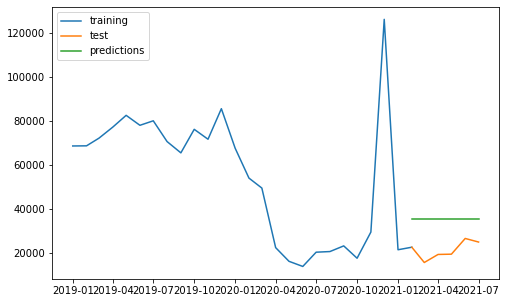

a
                       0
data                    
2021-08-01  35165.918208


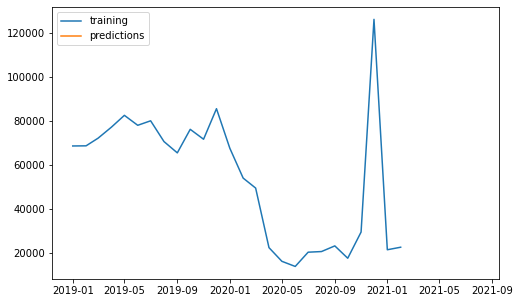

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=449.319, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=444.969, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=447.939, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=446.384, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=437.881, Time=0.59 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(1,1,0)(3,0,2)[12] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(

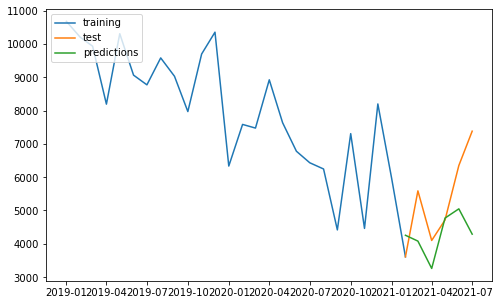

a
                      0
data                   
2021-08-01  4255.298211


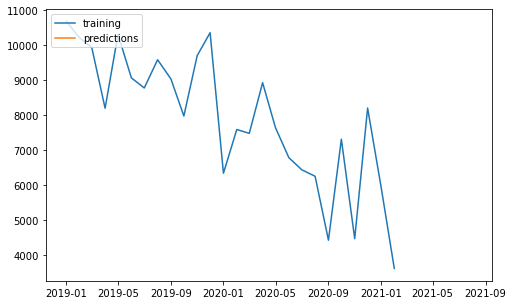

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=657.877, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=657.687, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=654.319, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=655.919, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=652.576, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=654.564, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=654.635, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=655.559, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=655.777, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=655.220, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=648.936, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=650.929, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=650.924, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12]             

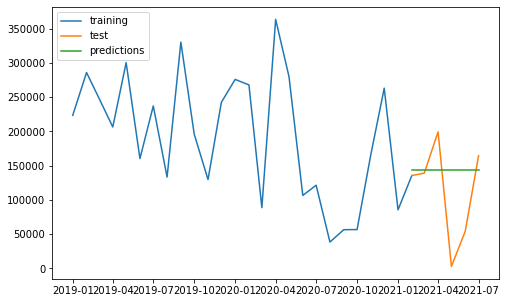

a
                        0
data                     
2021-08-01  143786.471639


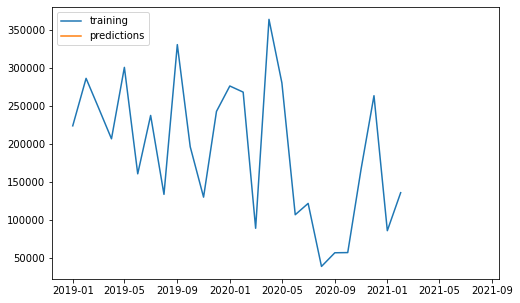

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=536.747, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=538.119, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=538.168, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=580.348, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=538.738, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=538.624, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=540.624, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=536.143, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=538.094, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=540.092, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=538.062, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=538.106, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=536.174, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=540.081, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12]         

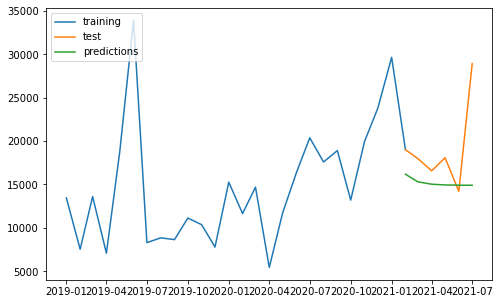

a
                       0
data                    
2021-08-01  16180.043995


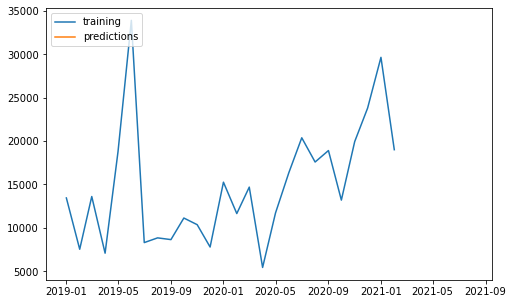

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=500.685, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=503.879, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=503.011, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=528.370, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=502.473, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=501.483, Time=0.07 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=503.481, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=502.229, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=502.281, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=504.295, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.470 seconds


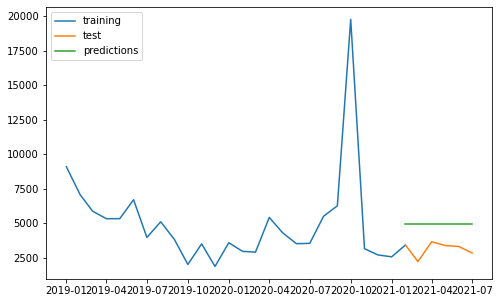

a
                      0
data                   
2021-08-01  4970.423077


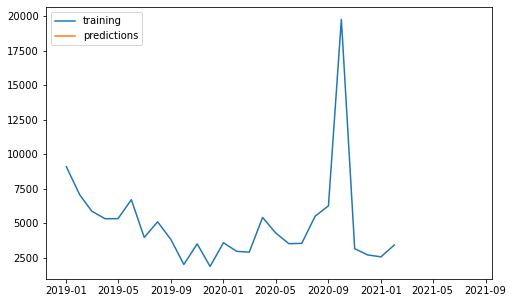

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=457.170, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=454.265, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=452.214, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=526.347, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=452.635, Time=0.08 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=454.212, Time=0.32 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=454.549, Time=0.28 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=454.732, Time=0.16 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=454.230, Time=0.32 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=453.049, Time=0.13 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=456.196, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[12]             : AIC=in

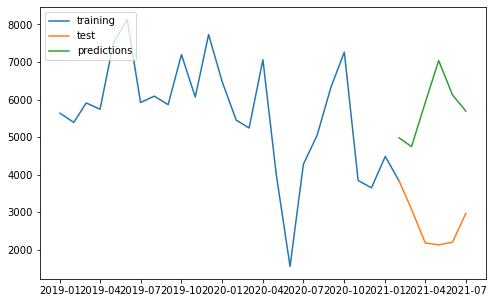

a
                     0
data                  
2021-08-01  4980.80932


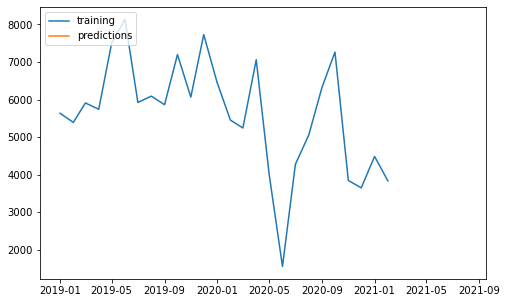

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=476.857, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=470.676, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=469.034, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=474.949, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=469.755, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=472.108, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=470.219, Time=0.20 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=474.495, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=470.813, Time=0.23 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=470.619, Time=0.15 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=469.679, Time=0.08 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=46

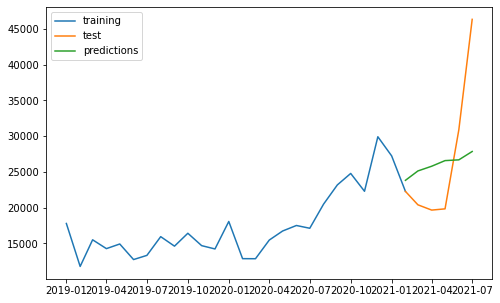

a
                       0
data                    
2021-08-01  23821.674408


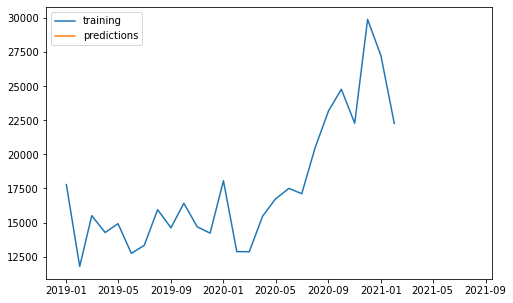

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=453.964, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=451.563, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=453.659, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=516.137, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=449.571, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=451.570, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=453.511, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=449.760, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=450.770, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=452.551, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=451.758, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=456.200, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.464 seconds


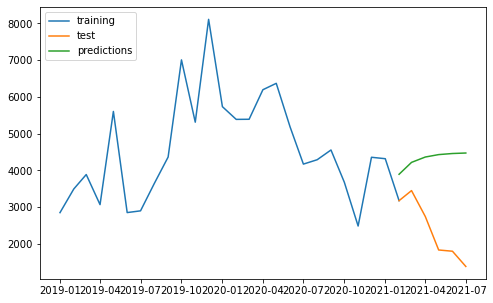

a
                      0
data                   
2021-08-01  3896.165932


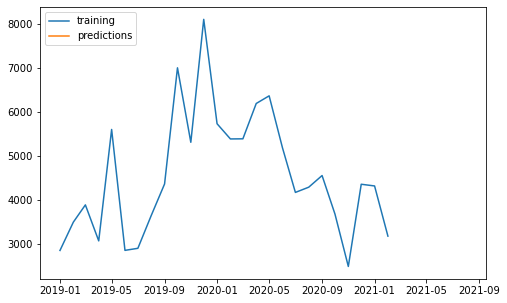

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=471.145, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=466.286, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=460.176, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=515.287, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=458.739, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=460.499, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=462.140, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=460.218, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=460.084, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=464.407, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=462.405, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 1.049 seconds


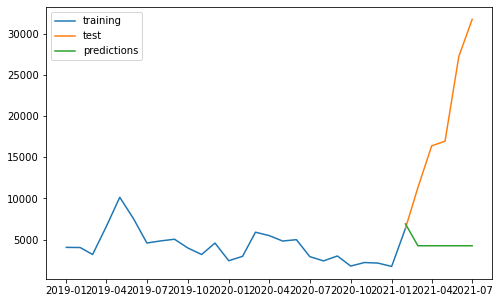

a
                      0
data                   
2021-08-01  6905.433072


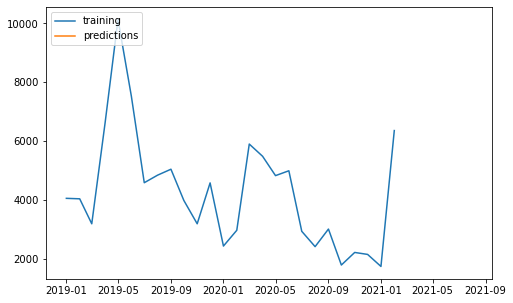

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=507.718, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=482.973, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=565.136, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=482.488, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=482.150, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=484.687, Time=0.08 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=484.568, Time=0.08 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=486.461, Time=0.22 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=483.566, Time=0.07 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=483.579, Time=0.15 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=485.397, Time=0.13 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=486.481, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,1)[12] int

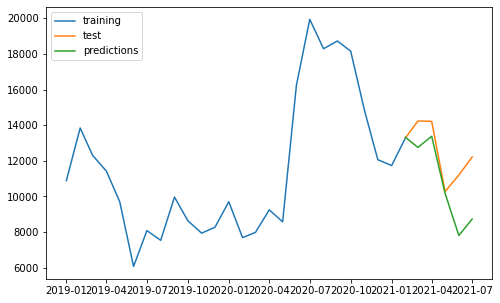

a
                       0
data                    
2021-08-01  13317.453478


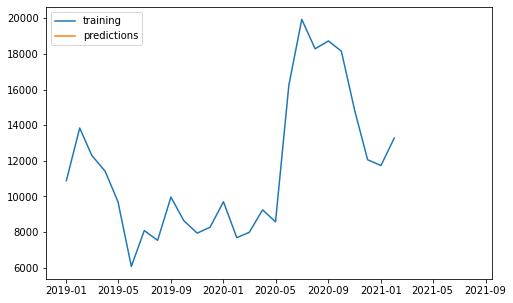

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=458.450, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=451.092, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=451.397, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=470.666, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=449.173, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=451.038, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=453.007, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=451.064, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=451.056, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=450.450, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=453.096, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=449.976, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.501 seconds


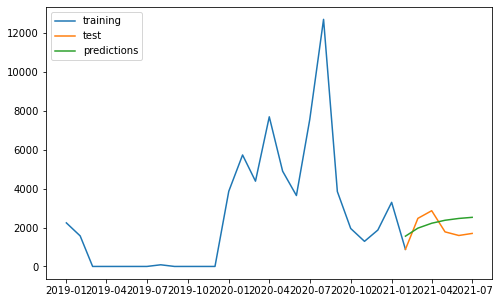

a
                      0
data                   
2021-08-01  1556.760454


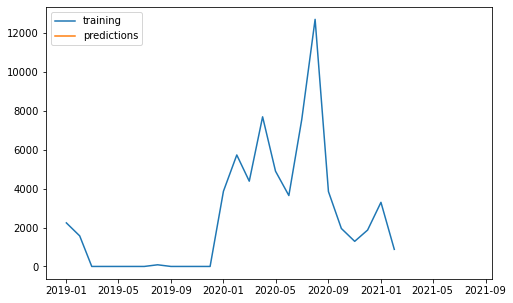

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=467.875, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=471.727, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=471.615, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=526.027, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=469.846, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=469.334, Time=0.08 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=471.352, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=469.879, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=469.835, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=470.719, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.470 seconds


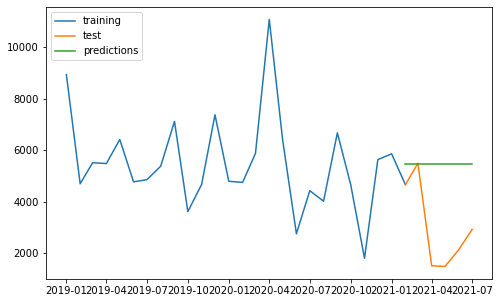

a
                      0
data                   
2021-08-01  5466.692308


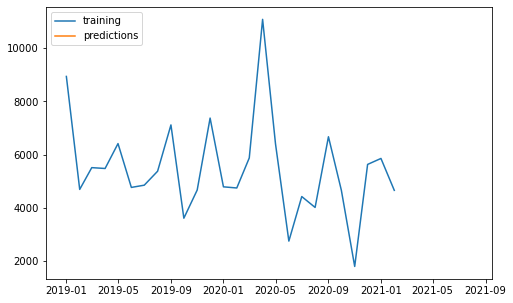

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=446.239, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=449.634, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=449.285, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=517.820, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=448.206, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=447.315, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=449.363, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=447.675, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=448.364, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=449.780, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.442 seconds


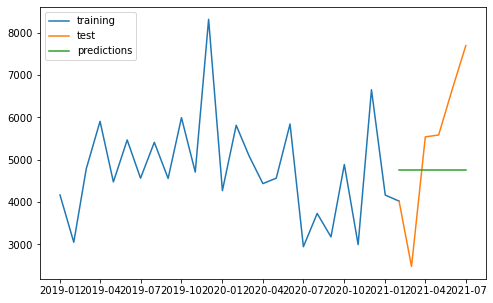

a
                      0
data                   
2021-08-01  4770.807692


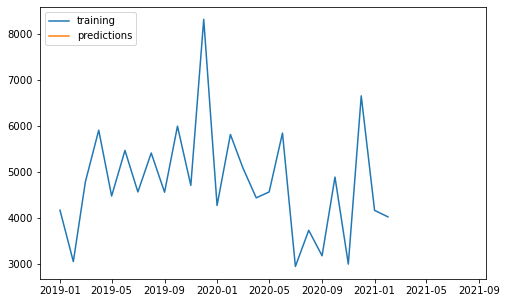

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=469.324, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=472.209, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=468.120, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=467.431, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=471.285, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=471.253, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=470.242, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=468.215, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=468.529, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.925 seconds


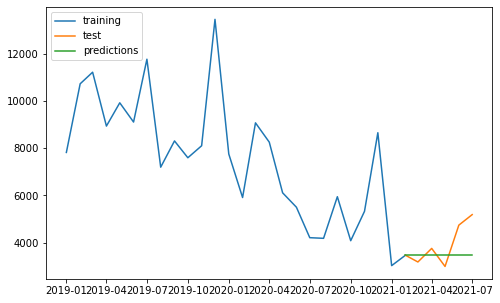

a
                 0
data              
2021-08-01  3472.0


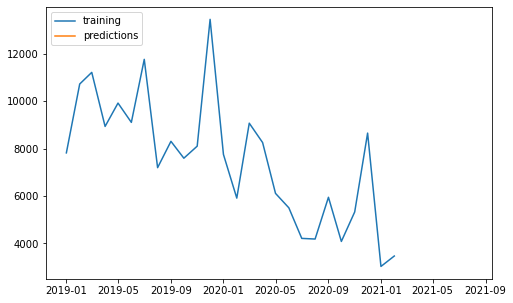

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=447.719, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=445.760, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=445.457, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=445.893, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=443.510, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=445.472, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=445.203, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=444.857, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=443.780, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=441.977, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=443.931, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=443.791, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AI

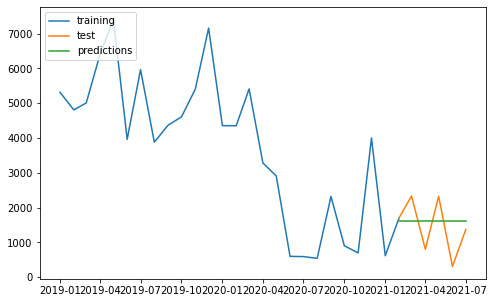

a
                      0
data                   
2021-08-01  1618.361666


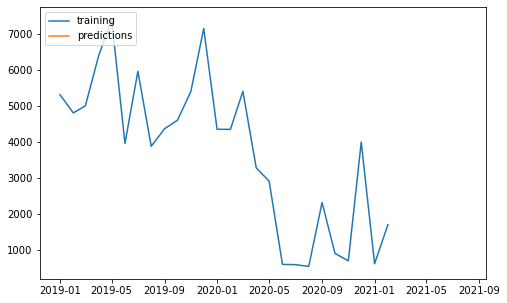

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=536.814, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=536.481, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=536.272, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=534.833, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=538.049, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=538.128, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=539.900, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=535.464, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=533.232, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=536.568, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=535.905, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=537.441, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=537.072, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12]             

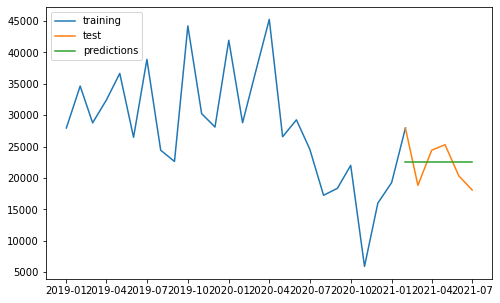

a
                       0
data                    
2021-08-01  22493.060859


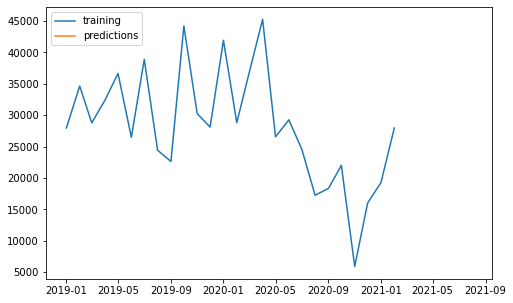

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=517.373, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=501.805, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=511.290, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=573.064, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=500.492, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=501.796, Time=0.04 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=503.752, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=501.882, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=502.401, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=509.753, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=504.900, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.517 seconds


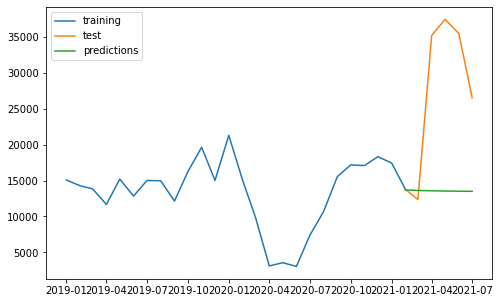

a
                       0
data                    
2021-08-01  13688.059296


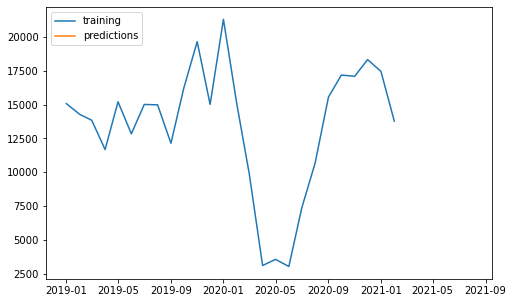

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=506.173, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=505.031, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=507.326, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=504.939, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=506.886, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=507.098, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=508.662, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=502.996, Time=0.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=505.198, Time=0.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=504.939, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=504.217, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=505.551, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=506.407, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12]             

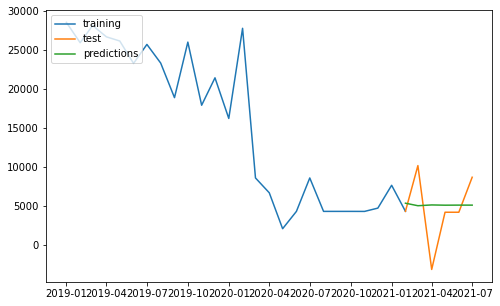

a
                      0
data                   
2021-08-01  5338.597347


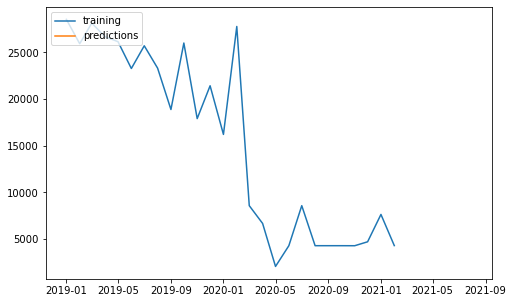

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=503.097, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=501.288, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=502.073, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=501.278, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=501.798, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=500.527, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=502.524, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=502.498, Time=0.08 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=499.984, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=502.239, Time=0.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=501.983, Time=0.08 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=501.750, Time=0.08 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AI

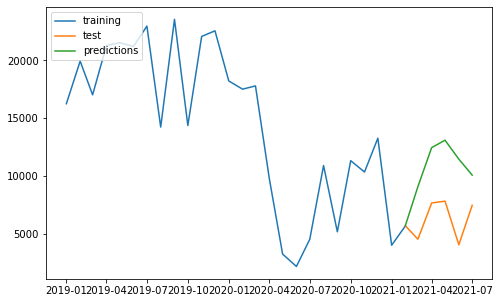

a
                     0
data                  
2021-08-01  5760.34538


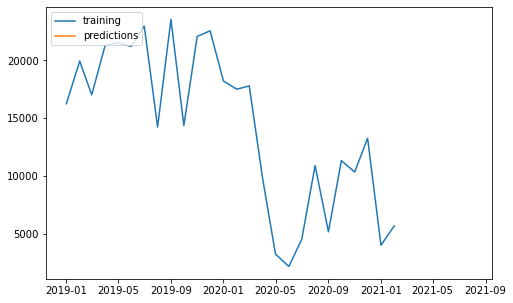

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=445.430, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=447.424, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=445.164, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=447.385, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=447.382, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=449.381, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=445.531, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.702 seconds


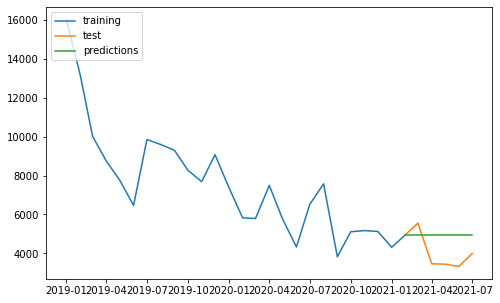

a
                 0
data              
2021-08-01  4954.0


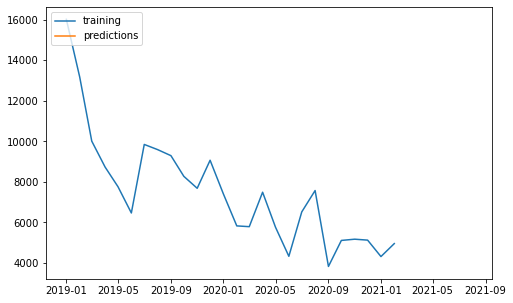

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=529.304, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=531.417, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=530.920, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=584.176, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=531.067, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=528.233, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=530.230, Time=0.05 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=529.790, Time=0.08 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=531.787, Time=0.12 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=530.353, Time=0.05 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=532.025, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 0.639 seconds


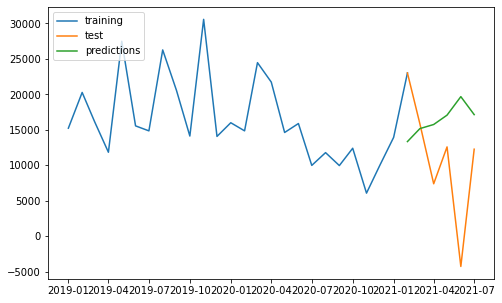

a
                       0
data                    
2021-08-01  13339.695877


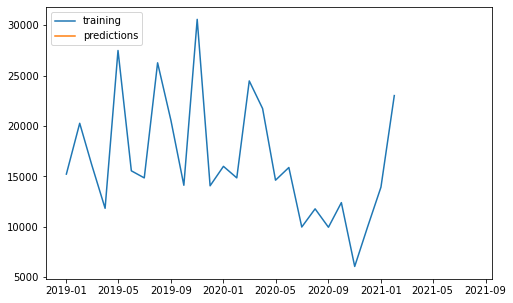

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=483.963, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=483.568, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=480.997, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=512.386, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=479.001, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=480.945, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=482.892, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=480.877, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=481.300, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=481.576, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=482.795, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=495.231, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 0.479 seconds


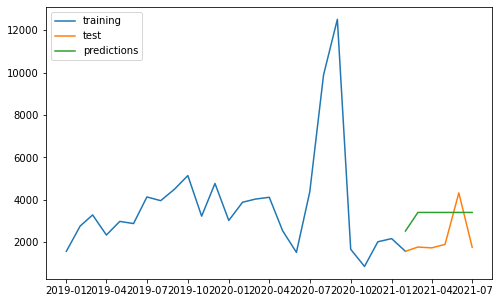

a
                      0
data                   
2021-08-01  2523.827129


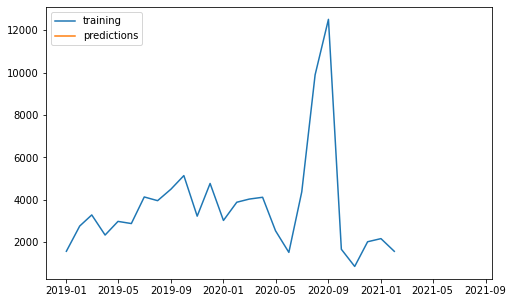

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=473.044, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=467.825, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=464.286, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=471.424, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=467.880, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=465.769, Time=0.35 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=465.412, Time=0.49 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=466.036, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=471.972, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=463.670, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=465.274, Time=0.39 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=464.972, Time=0.47 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AI

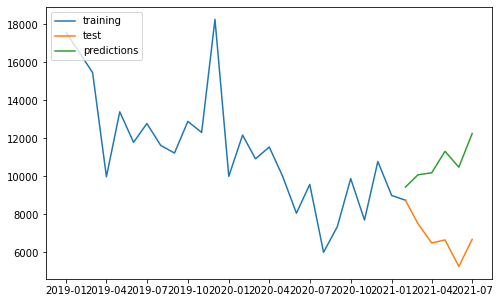

a
                      0
data                   
2021-08-01  9439.311684


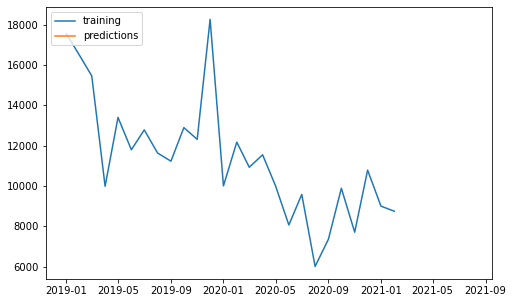

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=475.214, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=478.646, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=473.279, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=477.072, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=477.043, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=478.870, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=476.677, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.733 seconds


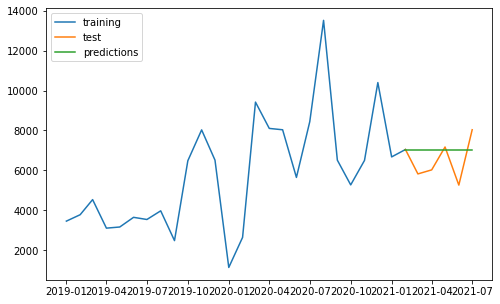

a
                 0
data              
2021-08-01  7047.0


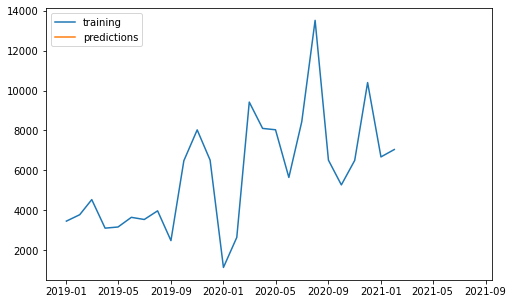

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=498.680, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=485.287, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=485.157, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=496.897, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=487.249, Time=0.37 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=486.919, Time=0.43 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=485.005, Time=0.35 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=486.919, Time=0.47 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=495.463, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=487.030, Time=0.08 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=487.546, Time=0.08 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=487.656, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AI

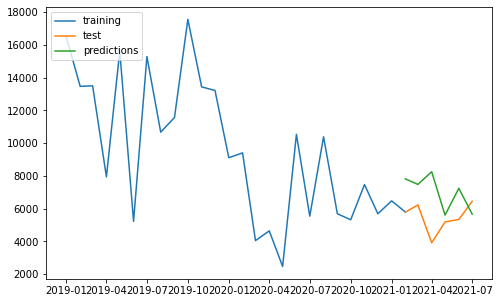

a
                      0
data                   
2021-08-01  7820.462719


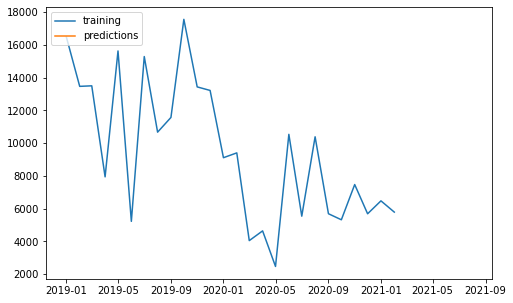

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=476.741, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=455.935, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=464.998, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=475.412, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=457.715, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=457.884, Time=0.10 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=457.807, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=455.987, Time=0.15 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=459.479, Time=0.45 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=476.121, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=454.103, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=456.182, Time=0.05 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=456.069, Time=0.10 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=455.391, Time=0.18 sec
 ARIMA(2,1,0)(0,0,1)[12] intercep

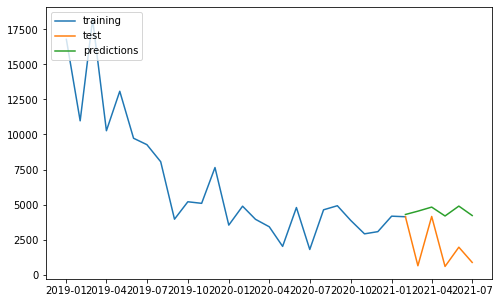

a
                      0
data                   
2021-08-01  4290.298576


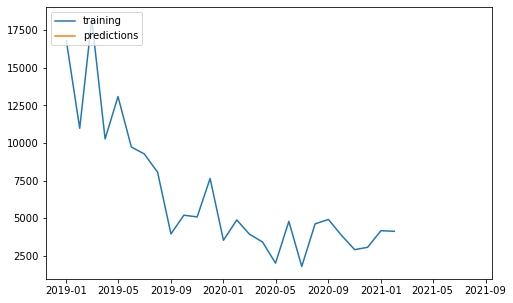

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=479.533, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=478.005, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=479.085, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=525.165, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=476.007, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=477.986, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=479.967, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=477.637, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=477.535, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=477.688, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=479.484, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=483.517, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.517 seconds


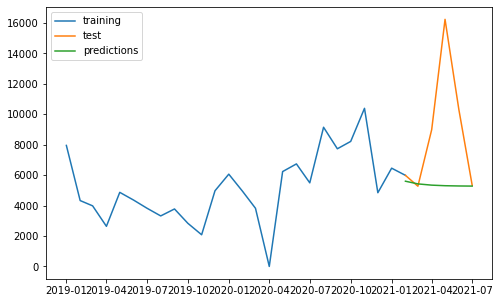

a
                      0
data                   
2021-08-01  5599.307802


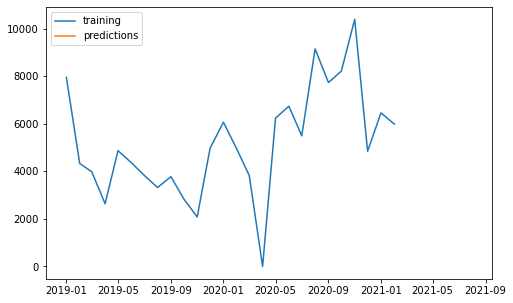

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=472.857, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=476.077, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=476.020, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=540.280, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=474.787, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=473.204, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=475.354, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=474.351, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=474.395, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=476.190, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.454 seconds


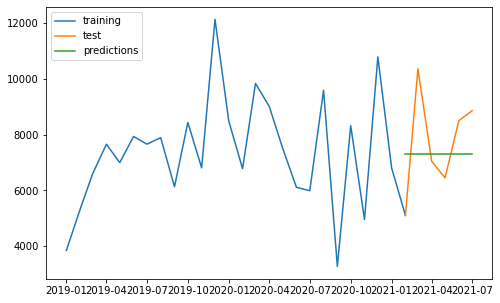

a
                 0
data              
2021-08-01  7308.0


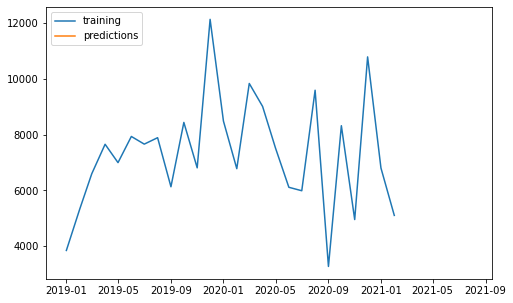

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=521.478, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=525.333, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=525.462, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=537.386, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=523.350, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=523.079, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=525.079, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=523.403, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=523.724, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=525.562, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.285 seconds


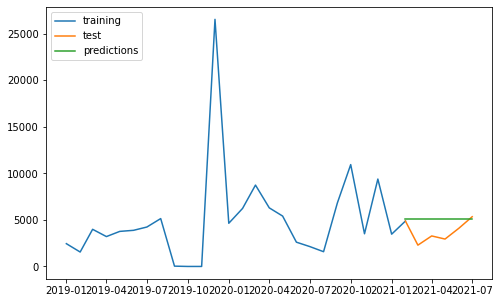

a
                      0
data                   
2021-08-01  5055.115385


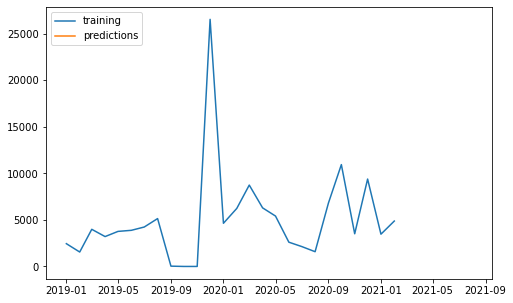

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=500.769, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=500.396, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=569.159, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=501.099, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=501.231, Time=0.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=500.052, Time=0.12 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=498.206, Time=0.05 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=499.647, Time=0.15 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=501.626, Time=0.22 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=500.337, Time=0.10 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=500.746, Time=0.05 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=502.572, Time=0.12 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AI

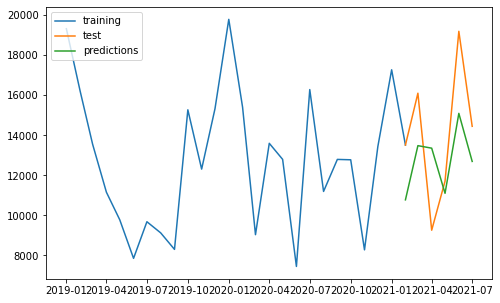

a
                       0
data                    
2021-08-01  10777.389926


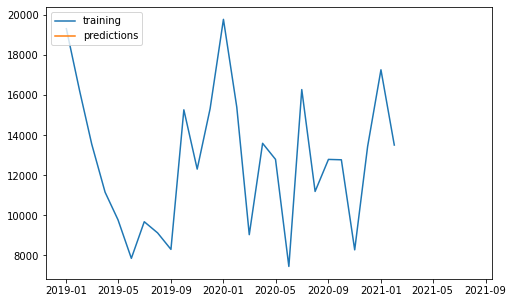

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=572.661, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=566.660, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=559.533, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=570.685, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=568.548, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=562.666, Time=0.55 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=570.542, Time=0.05 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=574.659, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=566.701, Time=0.08 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=563.750, Time=0.15 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=566.648, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=55

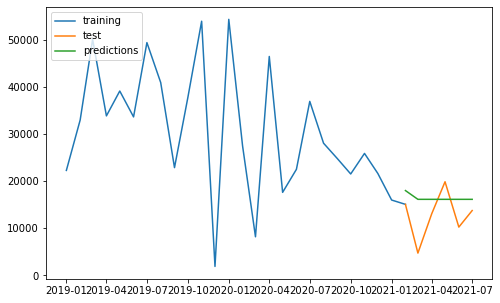

a
                      0
data                   
2021-08-01  17995.13308


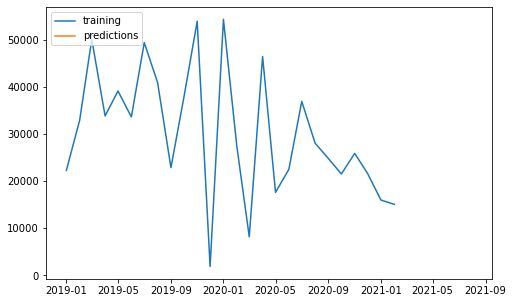

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=538.211, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=537.701, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=538.948, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=536.712, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=538.379, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=537.893, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=539.774, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=537.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=539.045, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=536.729, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.439 seconds


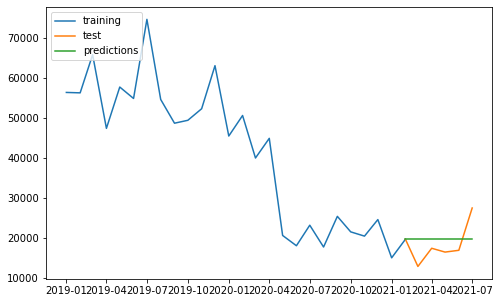

a
                  0
data               
2021-08-01  19607.0


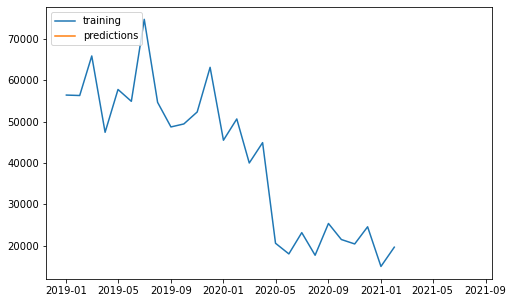

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=572.892, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=569.180, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=571.658, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=570.977, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=567.305, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=569.165, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=571.154, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=570.250, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=569.450, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=570.042, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=571.919, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=565.122, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=567.015, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=566.951, Time=0.04 sec
 ARIMA(1,1,0)(1,0,1)[12]         

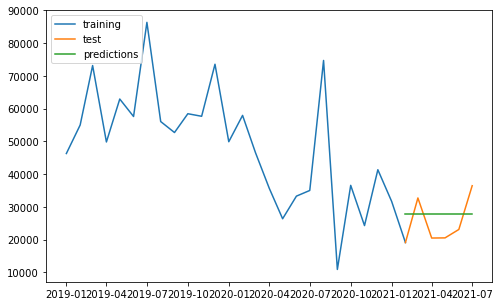

a
                       0
data                    
2021-08-01  27669.918414


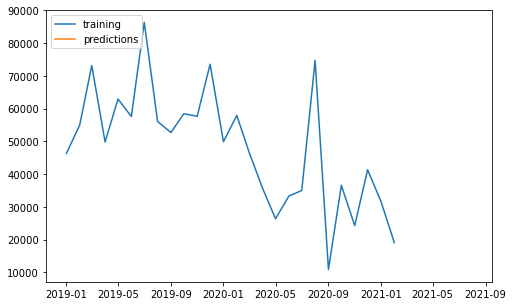

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=504.613, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=501.434, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=498.320, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=505.041, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=505.631, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=502.628, Time=0.08 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=502.531, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=501.021, Time=0.05 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=503.176, Time=0.27 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=500.353, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=502.188, Time=0.10 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=501.955, Time=0.08 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=501.261, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=503.733, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]         

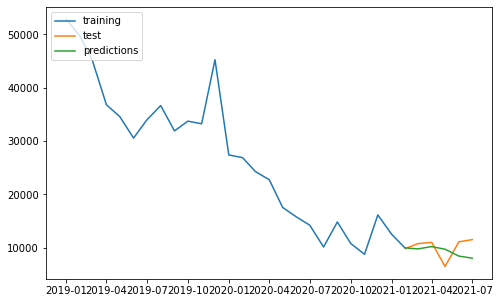

a
                      0
data                   
2021-08-01  9995.888813


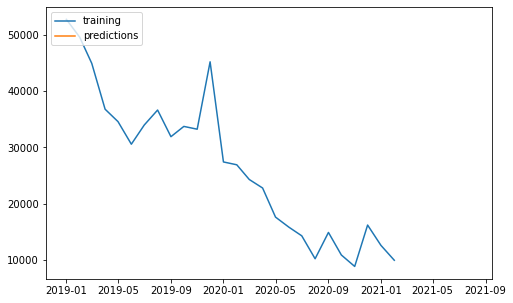

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=542.554, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=544.255, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=543.644, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=626.052, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=544.551, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=544.385, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=546.385, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=542.672, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=542.669, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=544.346, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.339 seconds


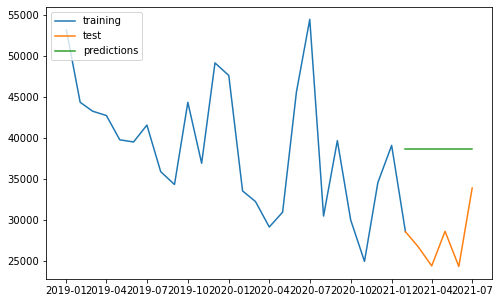

a
                       0
data                    
2021-08-01  38678.461538


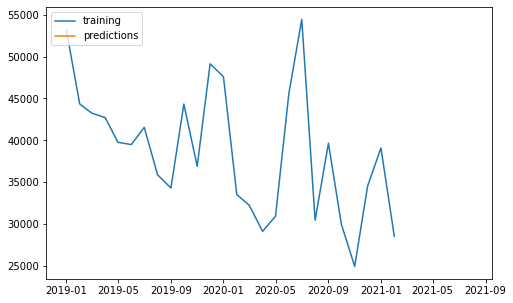

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=512.042, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=512.788, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=512.852, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=573.620, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=514.031, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=513.744, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=515.744, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=511.005, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=512.574, Time=0.04 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=514.571, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=512.966, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=513.242, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=511.011, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=515.131, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12]         

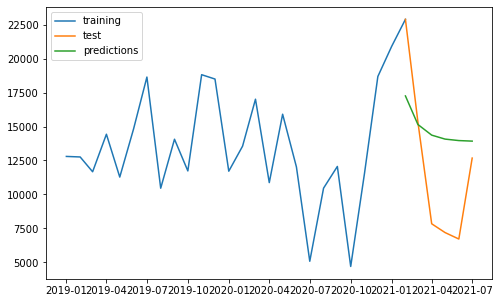

a
                       0
data                    
2021-08-01  17250.795193


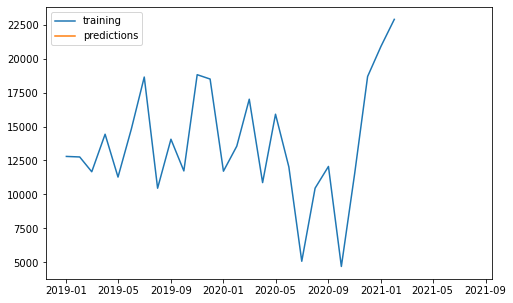

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=504.396, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=505.962, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=506.097, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=505.976, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=505.827, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=505.851, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=507.826, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=504.906, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=504.848, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=507.539, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 0.533 seconds


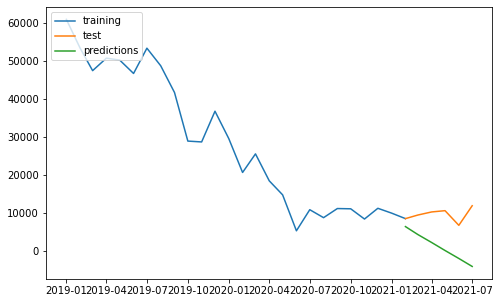

a
                  0
data               
2021-08-01  6315.24


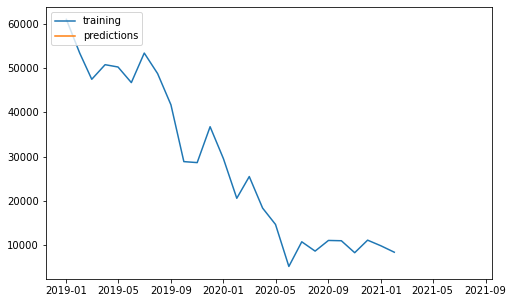

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=553.545, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=554.590, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=555.139, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=552.289, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=554.794, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=554.655, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=556.546, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=553.854, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=554.315, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=555.985, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.348 seconds


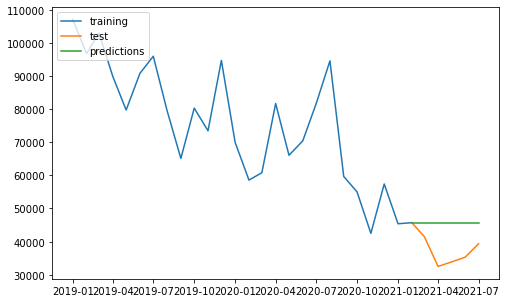

a
                  0
data               
2021-08-01  45699.0


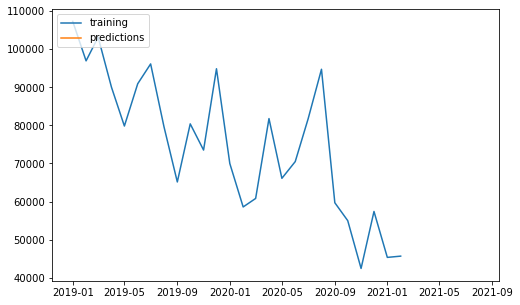

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=597.177, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=586.886, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=590.747, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=690.468, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=587.169, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=588.562, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=587.854, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=585.874, Time=0.05 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=587.587, Time=0.09 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=589.567, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=598.191, Time=0.05 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=586.408, Time=0.08 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=587.295, Time=0.07 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=588.993, Time=0.15 sec
 ARIMA(1,0,0)(0,0,1)[12]         

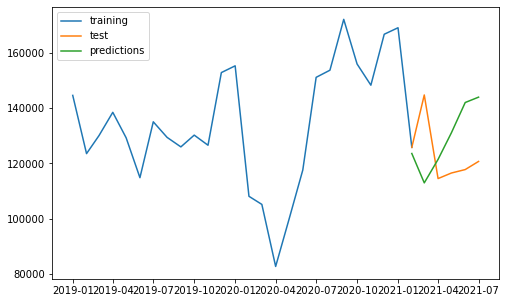

a
                       0
data                    
2021-08-01  123594.05563


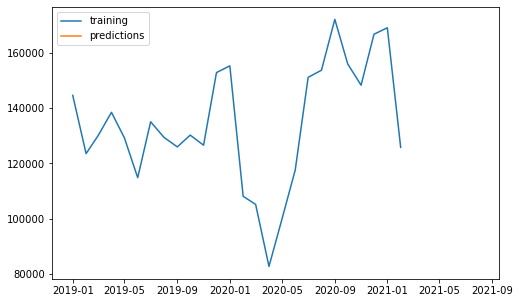

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=580.299, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=580.389, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=585.804, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=578.872, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=582.023, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=581.947, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=583.827, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=579.450, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=584.997, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=576.108, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=575.971, Time=0.08 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=574.174, Time=0.22 sec
 ARIMA(1,1,1)(3,0,0)[12] intercept   : AIC=576.153, Time=0.75 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=576.041, Time=0.46 sec
 ARIMA(1,1,1)(1,0,1)[12] intercep

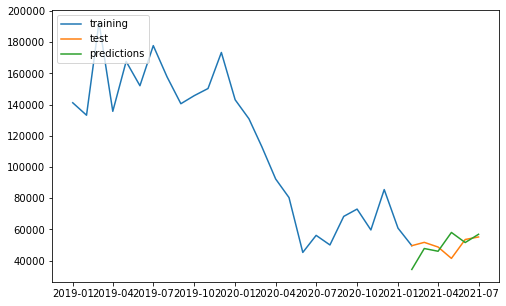

a
                       0
data                    
2021-08-01  34373.681958


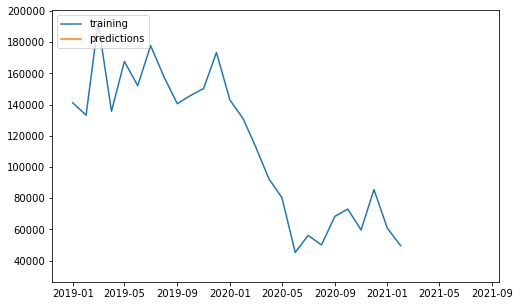

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=531.225, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=508.181, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=518.745, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=580.070, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=506.645, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=508.138, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=510.138, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=508.591, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=508.783, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=517.370, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=510.506, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=509.242, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.602 seconds


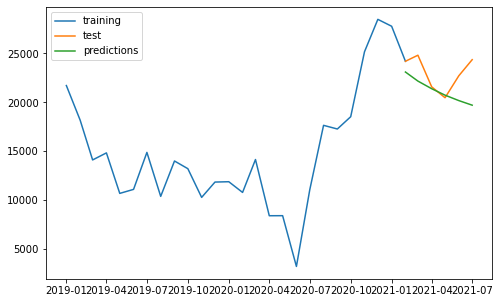

a
                       0
data                    
2021-08-01  23102.349139


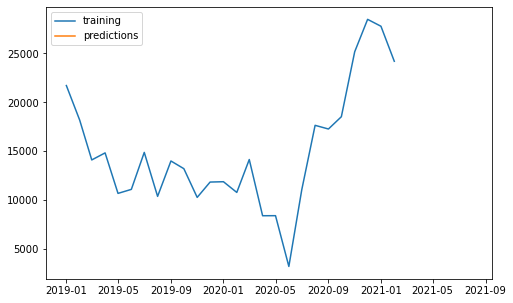

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=513.140, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=514.762, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=516.903, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=512.165, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=514.152, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=514.124, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=516.124, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=514.171, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=515.912, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.464 seconds


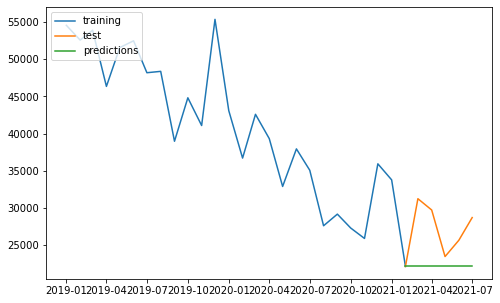

a
                  0
data               
2021-08-01  22148.0


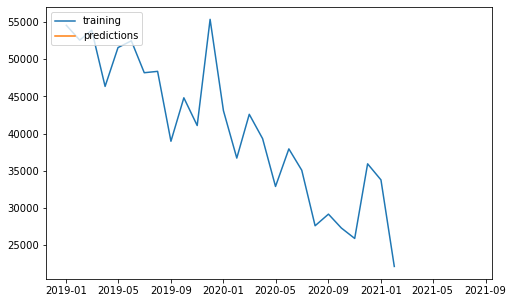

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=540.711, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=542.855, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=542.789, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=539.384, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=542.016, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=542.064, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=543.992, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=541.772, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=541.601, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=544.816, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.496 seconds


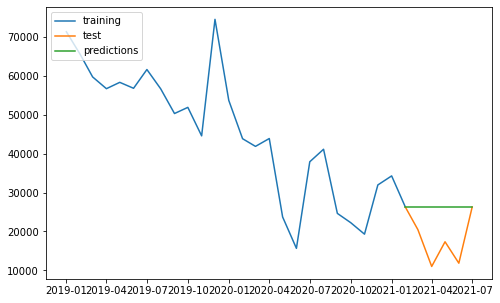

a
                  0
data               
2021-08-01  26246.0


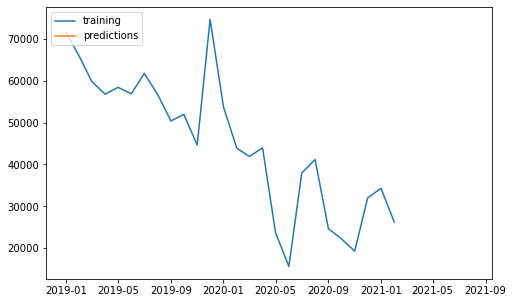

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=571.246, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=567.797, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=567.563, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=654.918, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=566.202, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=568.156, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=569.481, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=567.993, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=566.015, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=567.080, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=569.023, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=567.947, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=569.988, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12]             

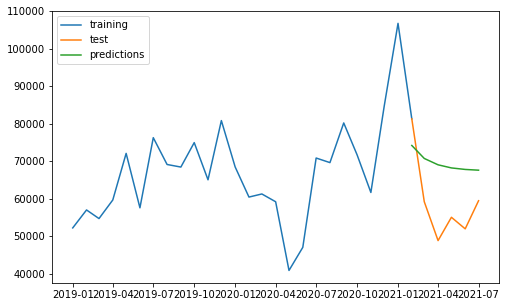

a
                       0
data                    
2021-08-01  74200.996692


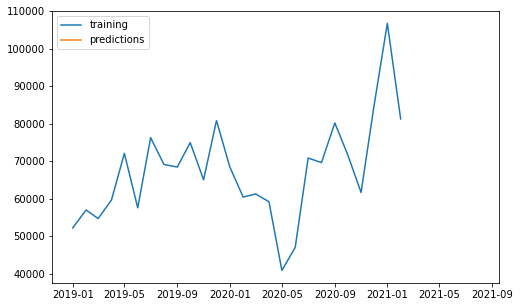

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=519.867, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=523.042, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=523.074, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=518.860, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=521.867, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=521.867, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=523.867, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=521.076, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=521.121, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=521.173, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.417 seconds


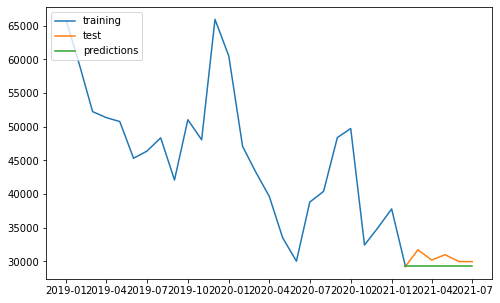

a
                  0
data               
2021-08-01  29265.0


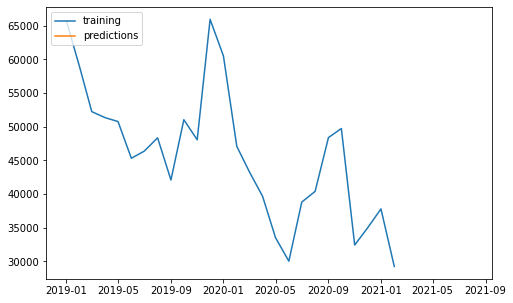

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=544.646, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=548.537, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=548.726, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=632.357, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=546.643, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=546.406, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=548.406, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=546.584, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=546.873, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=548.562, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.316 seconds


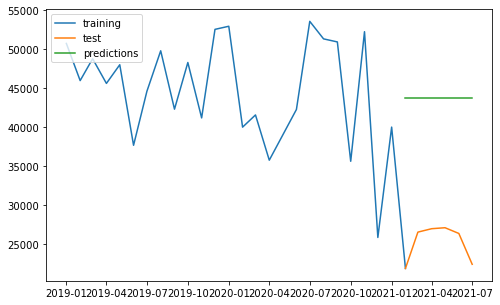

a
                       0
data                    
2021-08-01  43790.884615


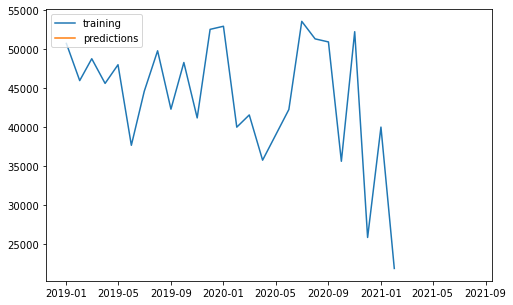

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=526.184, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=526.557, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=527.822, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=525.184, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=528.042, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=528.068, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=529.975, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=524.557, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=526.553, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=526.005, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=527.261, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=525.891, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=527.214, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12]             

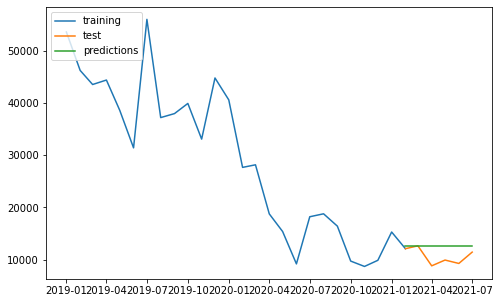

a
                       0
data                    
2021-08-01  12570.542072


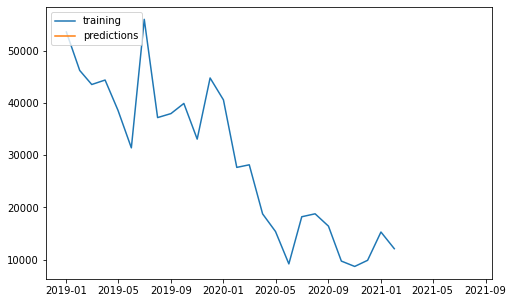

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=530.283, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=524.531, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=524.334, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=528.610, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=522.435, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=524.107, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=524.328, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=521.894, Time=0.14 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=533.994, Time=0.08 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=534.343, Time=0.06 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=inf, T

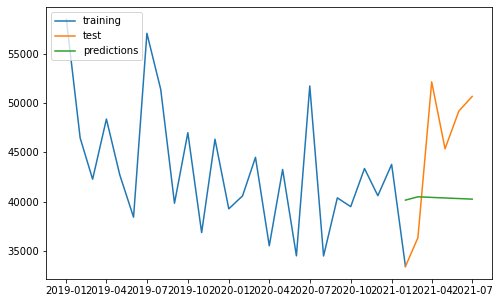

a
                       0
data                    
2021-08-01  40139.984791


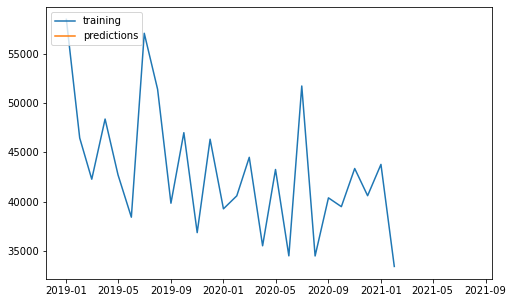

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=531.023, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=531.752, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=533.186, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=529.772, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=532.838, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=532.697, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=533.894, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=530.442, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=531.671, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=532.263, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.385 seconds


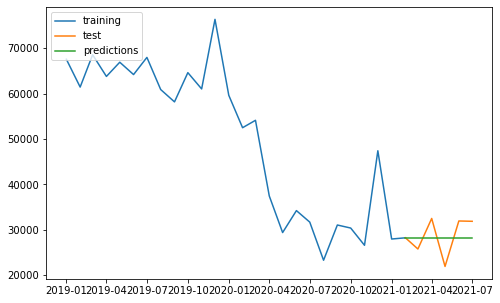

a
                  0
data               
2021-08-01  28212.0


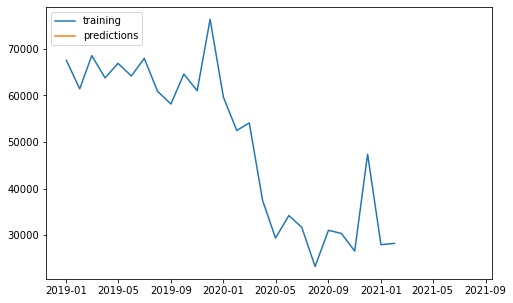

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=558.710, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=557.746, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=558.407, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=558.746, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=556.811, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=557.781, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=559.745, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=558.748, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=558.891, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=557.292, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=560.798, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=556.809, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=557.768, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=557.604, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12]         

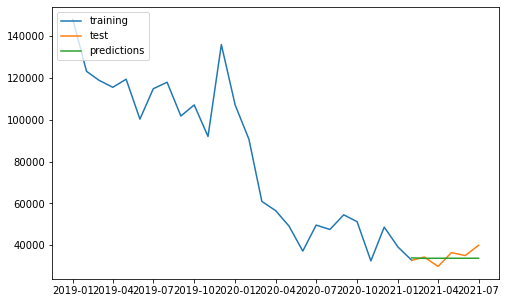

a
                      0
data                   
2021-08-01  33914.69275


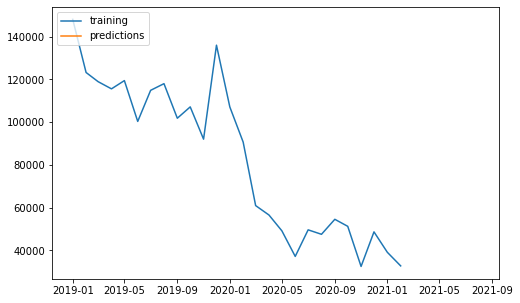

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=568.632, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=566.733, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=572.920, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=567.160, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=565.023, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=566.755, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=568.733, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=554.111, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=555.783, Time=0.06 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=555.333, Time=0.05 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=554.045, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=555.983, Time=0.08 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=555.884, Time=0.05 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   

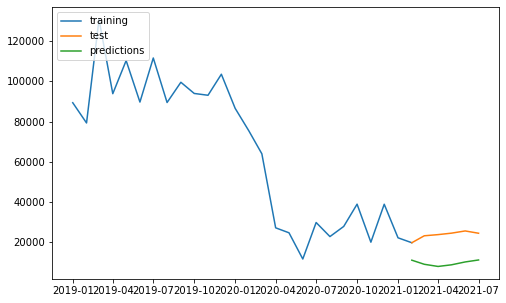

a
                       0
data                    
2021-08-01  11102.141472


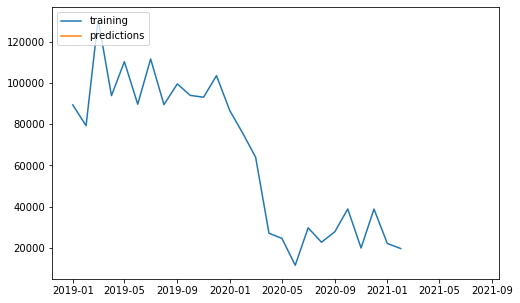

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=466.004, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=468.662, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=467.618, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=553.985, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=467.970, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=465.748, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=468.093, Time=0.07 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=467.716, Time=0.23 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=470.034, Time=0.17 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=467.984, Time=0.08 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=470.036, Time=0.12 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 1.102 seconds


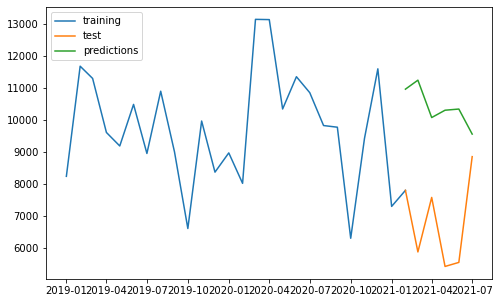

a
                       0
data                    
2021-08-01  10967.316505


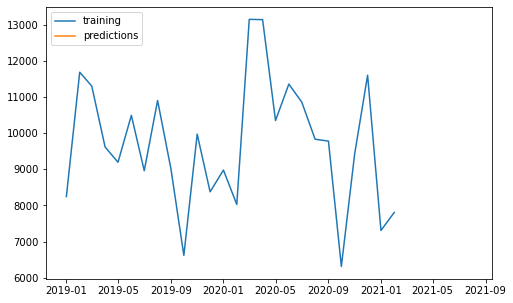

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=551.503, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=549.925, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=549.693, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=549.863, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=547.838, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=549.542, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=550.838, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=549.708, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=550.601, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=548.137, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=545.166, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=546.852, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=546.874, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12]             

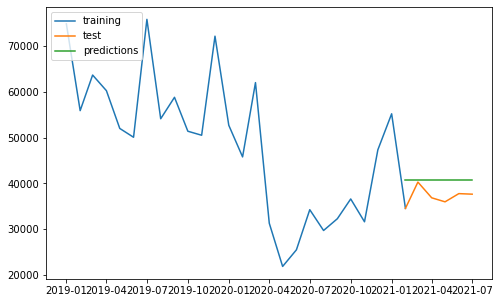

a
                       0
data                    
2021-08-01  40736.190065


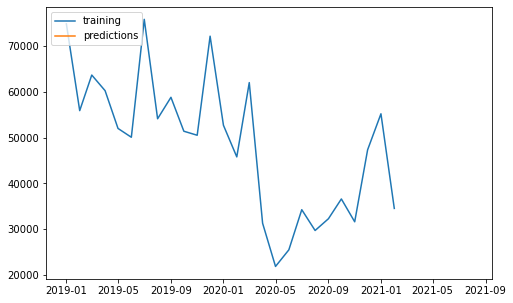

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=579.623, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=582.694, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=582.826, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=589.469, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=581.605, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=581.585, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=583.585, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=580.698, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=580.839, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=583.202, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.285 seconds


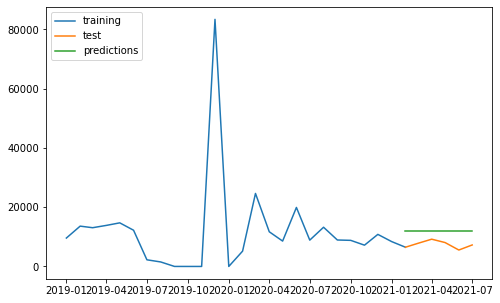

a
                       0
data                    
2021-08-01  11800.538462


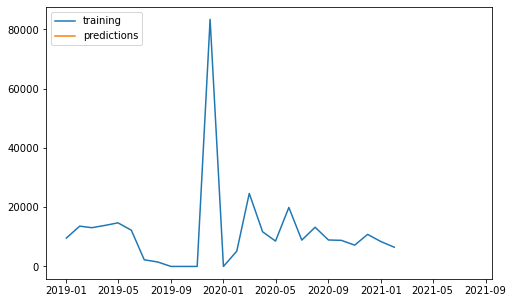

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=507.801, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=507.429, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=507.074, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=506.113, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=509.796, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=509.791, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=511.240, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=504.903, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=506.350, Time=0.07 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=507.239, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=506.763, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=508.080, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=505.598, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12]             

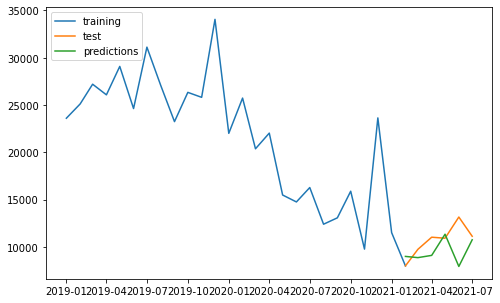

a
                      0
data                   
2021-08-01  9004.321866


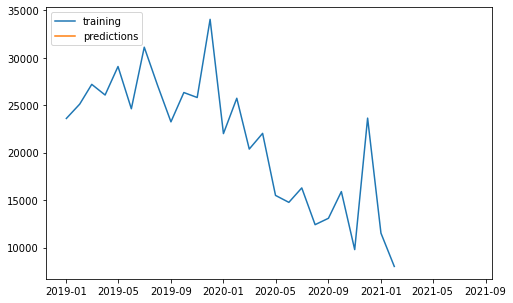

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=522.675, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=518.313, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=520.757, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=516.646, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=518.141, Time=0.03 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=519.750, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=507.644, Time=0.05 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=509.305, Time=0.05 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=509.027, Time=0.05 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=510.653, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=504.314, Time=0.03 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=505.974, Time=0.07 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=505.399, Time=0.06 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   

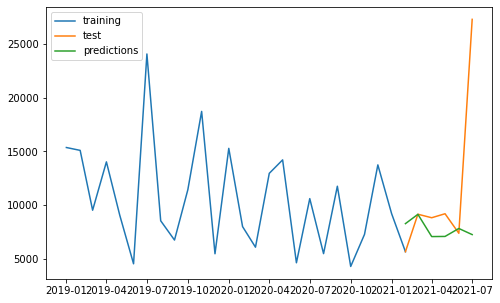

a
                      0
data                   
2021-08-01  8286.268167


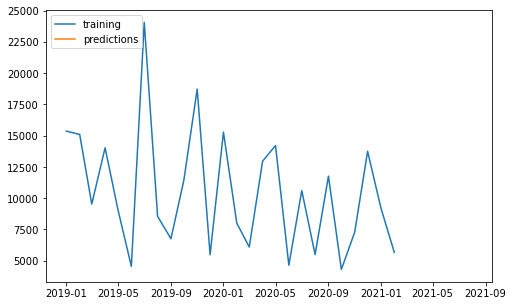

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=503.711, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=503.636, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=503.819, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=502.249, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=502.327, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=503.477, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=504.882, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=502.795, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=501.466, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=504.388, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=505.443, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=504.752, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=503.502, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=504.691, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12]         

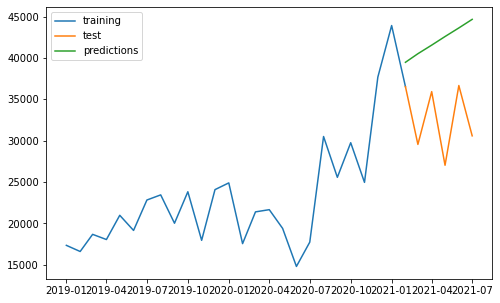

a
                       0
data                    
2021-08-01  39467.054058


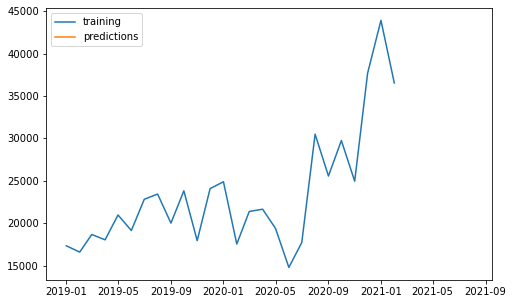

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=601.648, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=597.062, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=600.644, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=650.821, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=595.509, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=596.622, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=598.494, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=597.241, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=597.129, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=598.659, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=598.986, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=601.446, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.486 seconds


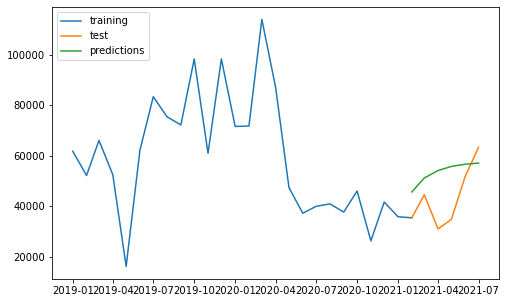

a
                       0
data                    
2021-08-01  45601.230499


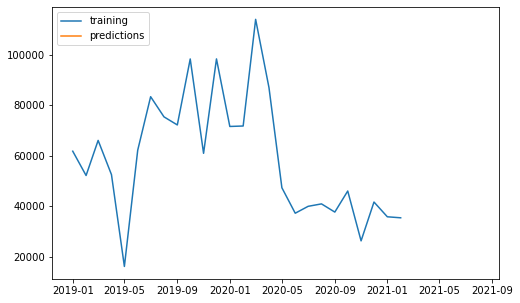

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=580.156, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=583.318, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=583.467, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=594.238, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=582.155, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=582.153, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=584.153, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=581.318, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=581.471, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=583.777, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.316 seconds


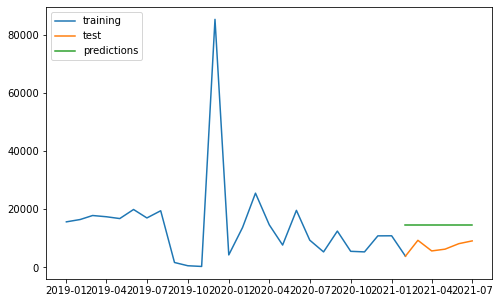

a
                       0
data                    
2021-08-01  14521.076923


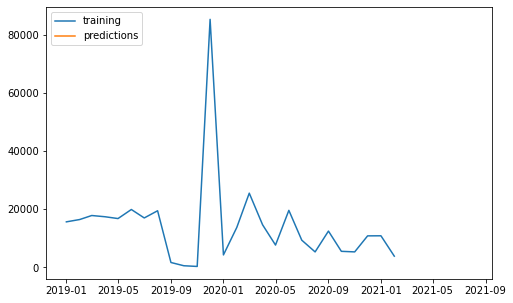

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=567.036, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=568.423, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=570.239, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=566.101, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=568.995, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=568.995, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=570.995, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=566.756, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=568.480, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=564.753, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=566.263, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=566.173, Time=0.10 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=568.037, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=563.249, Time=0.07 sec
 ARIMA(2,1,1)(1,0,0)[12] intercep

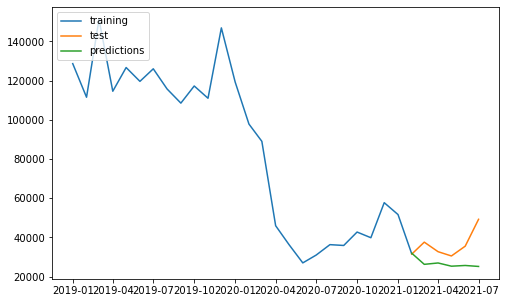

a
                       0
data                    
2021-08-01  31865.854339


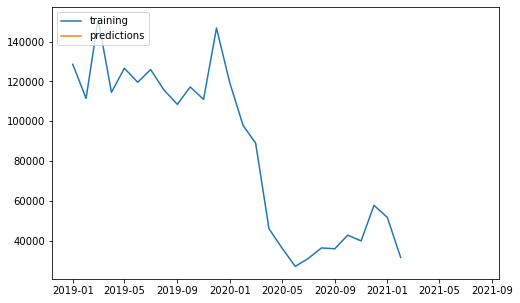

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=474.351, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=463.439, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=468.936, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=528.797, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=461.992, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=463.005, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=464.691, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=462.691, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=462.998, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=470.022, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=463.486, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=465.220, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.765 seconds


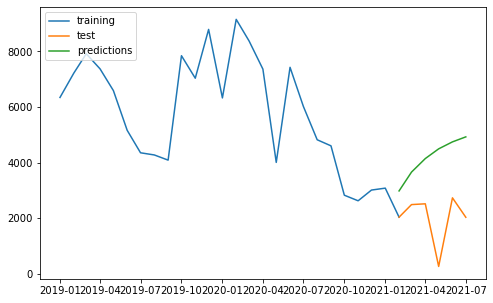

a
                      0
data                   
2021-08-01  2977.940417


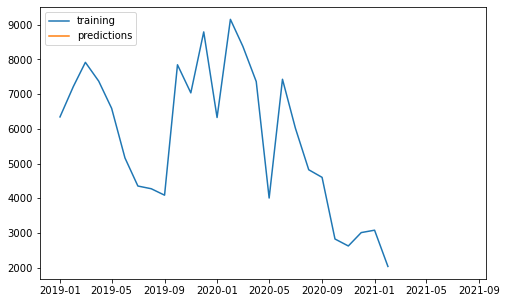

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=526.011, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=528.549, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=525.212, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=588.056, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=525.171, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=526.308, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=527.063, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=526.228, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=525.577, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=527.011, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=527.724, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=566.125, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 0.517 seconds


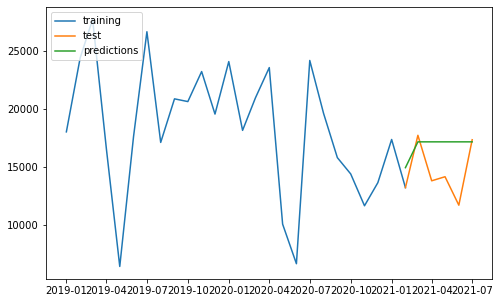

a
                       0
data                    
2021-08-01  14942.656723


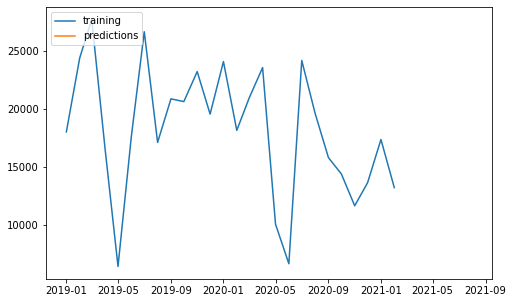

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=461.515, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=461.608, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=462.172, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=459.803, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=463.025, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=462.490, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=459.685, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=461.526, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=462.012, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=460.681, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=458.186, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=460.185, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=460.183, Time=0.13 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   

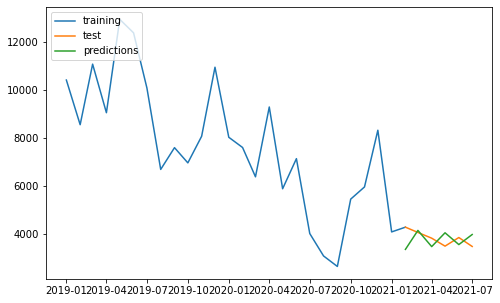

a
                      0
data                   
2021-08-01  3357.445631


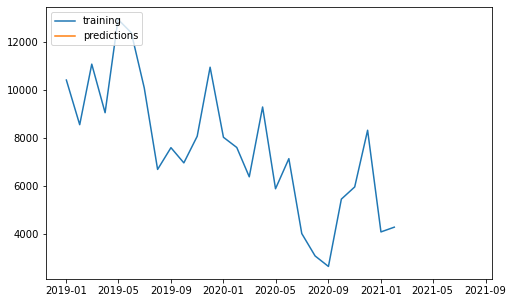

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=493.091, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=482.552, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=491.325, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=482.128, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=483.272, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=482.921, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=482.388, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=477.192, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=474.133, Time=0.25 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=473.810, Time=0.46 sec
 ARIMA(1,1,1)(3,0,0)[12] intercept   : AIC=478.289, Time=0.37 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=475.962, Time=0.86 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=474.755, Time=0.45 sec
 ARIMA(1,1,1)(3,0,1)[12] intercept   

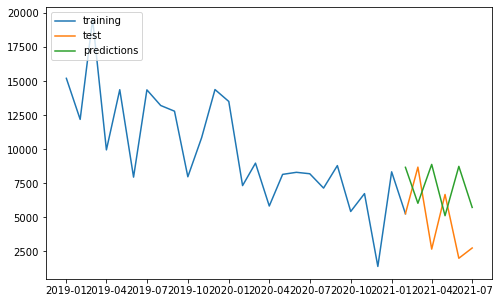

a
                      0
data                   
2021-08-01  8679.477226


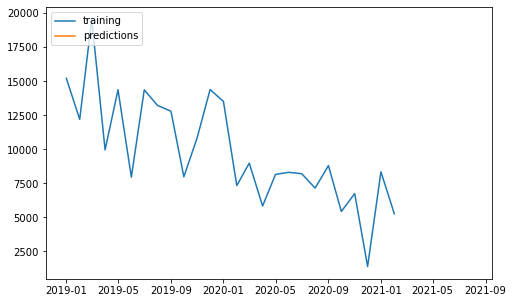

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=439.332, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=434.548, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=436.892, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=438.461, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=437.620, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=435.590, Time=0.25 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=435.604, Time=0.33 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=435.798, Time=0.10 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=437.582, Time=0.42 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=438.332, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=436.552, Time=0.17 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=436.465, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=435.491, Time=0.12 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=438.438, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[12]         

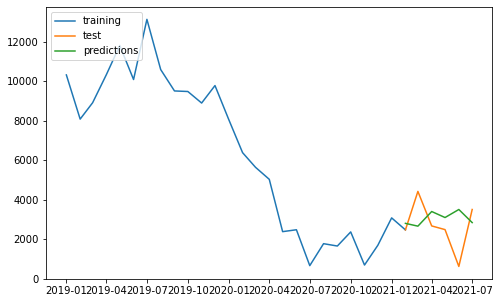

a
                      0
data                   
2021-08-01  2797.858697


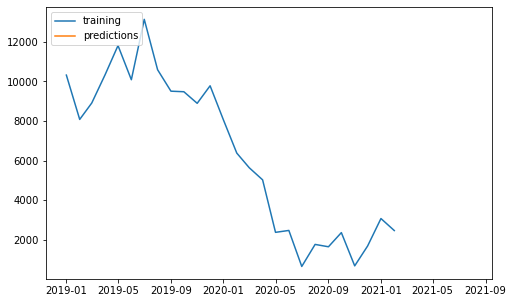

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=483.038, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=482.781, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=482.535, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=481.056, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=484.784, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=484.730, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=486.530, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=481.331, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=481.534, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=483.468, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.586 seconds


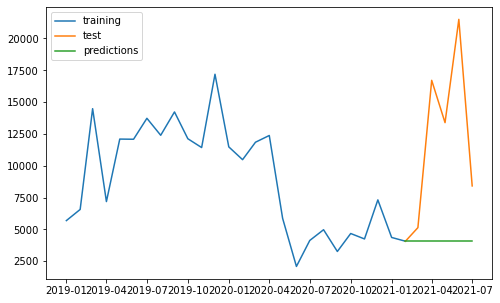

a
                 0
data              
2021-08-01  4076.0


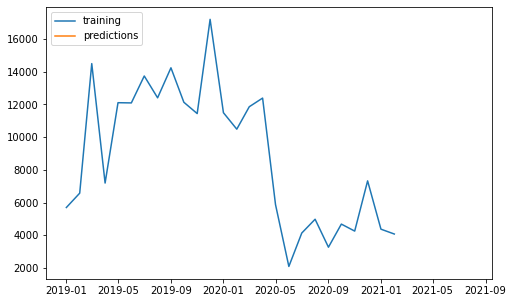

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=520.549, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=520.994, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=519.396, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=550.928, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=518.256, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=519.768, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=521.339, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=520.409, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=520.726, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=519.472, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=522.623, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=535.412, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 0.455 seconds


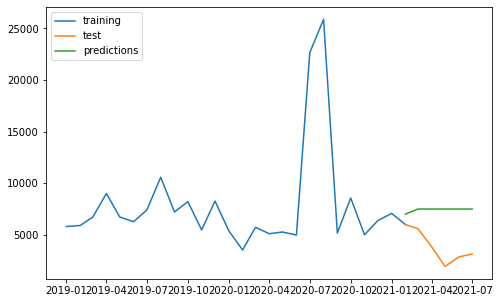

a
                      0
data                   
2021-08-01  6984.693661


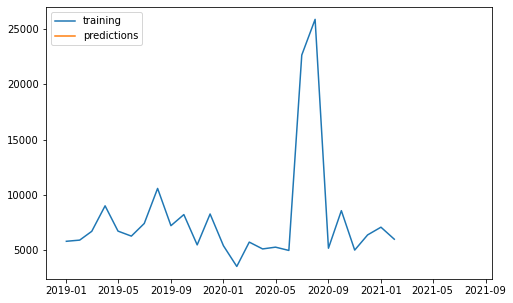

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=638.337, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=641.331, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=658.764, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=639.610, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=637.909, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=639.891, Time=0.05 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=639.838, Time=0.07 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=641.829, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=640.092, Time=0.06 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12] intercept
Total fit time: 0.671 seconds


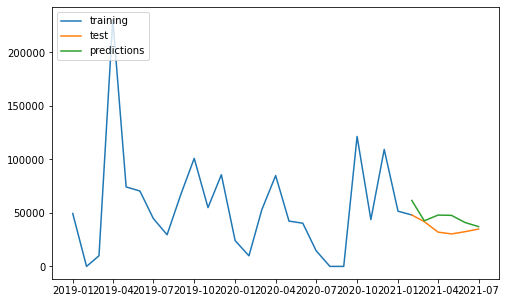

a
                       0
data                    
2021-08-01  61614.404306


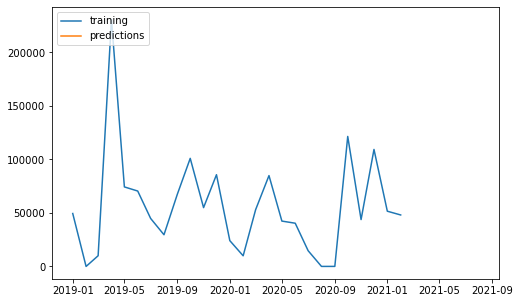

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=499.976, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=503.633, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=503.456, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=498.345, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=501.659, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=501.557, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=503.388, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=502.085, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=502.055, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=501.949, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.354 seconds


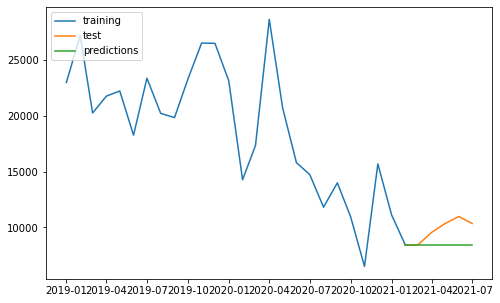

a
                 0
data              
2021-08-01  8396.0


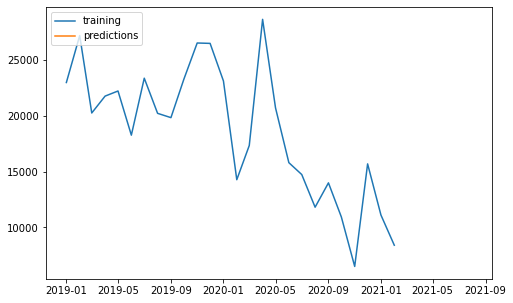

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=532.474, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=535.810, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=535.554, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=530.600, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=534.464, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=534.463, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=536.463, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=533.945, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=533.761, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=535.730, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.316 seconds


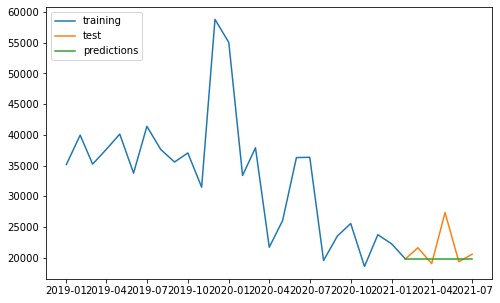

a
                  0
data               
2021-08-01  19795.0


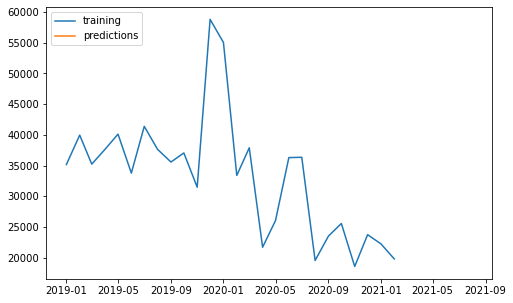

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=502.621, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=495.819, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=499.045, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=501.057, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=498.083, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=496.578, Time=0.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=497.087, Time=0.08 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=495.088, Time=0.05 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=497.002, Time=0.12 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=502.697, Time=0.05 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=494.656, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=499.919, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=498.854, Time=0.13 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   

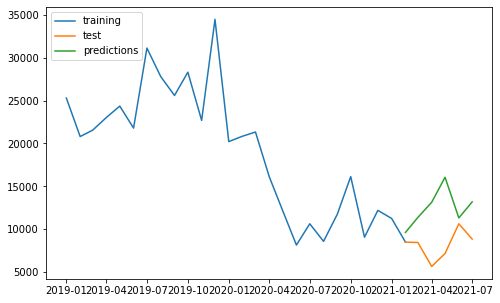

a
                      0
data                   
2021-08-01  9619.886514


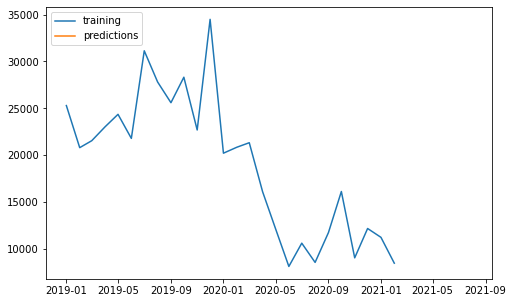

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=486.072, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=487.497, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=488.034, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=484.153, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=485.508, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=486.243, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=487.527, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=487.512, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=489.388, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.523 seconds


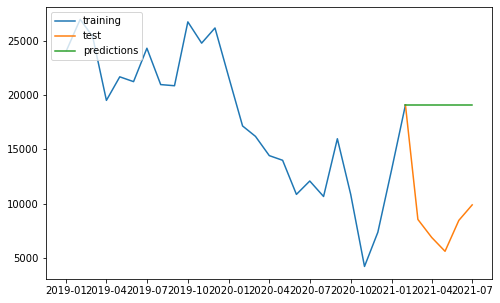

a
                  0
data               
2021-08-01  19083.0


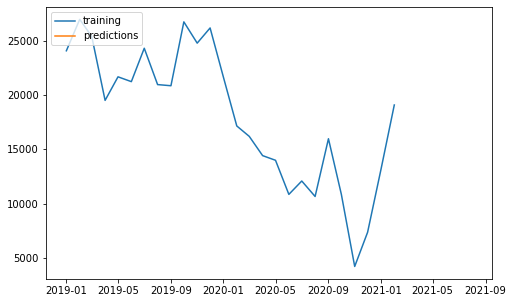

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=531.791, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=527.831, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=530.789, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=529.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=526.098, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=527.819, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=529.818, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=527.768, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=531.614, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=528.673, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=523.967, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=525.784, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=525.713, Time=0.04 sec
 ARIMA(1,1,0)(1,0,1)[12]             

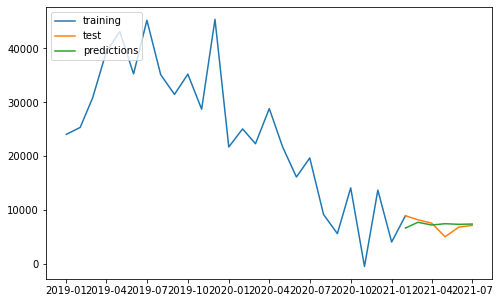

a
                      0
data                   
2021-08-01  6689.726861


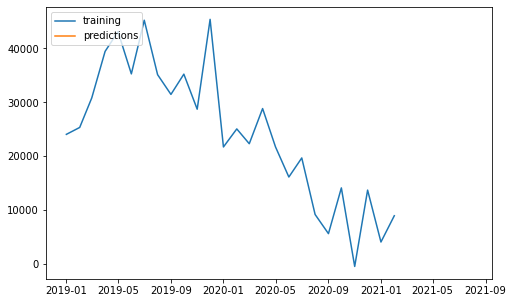

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=482.438, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=479.544, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=480.773, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=480.616, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=477.756, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=479.500, Time=0.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=480.661, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=479.600, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=479.744, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=478.923, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=475.738, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=477.578, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=477.460, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1)[12]             

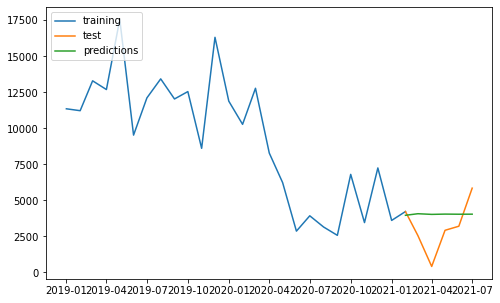

a
                      0
data                   
2021-08-01  3966.840934


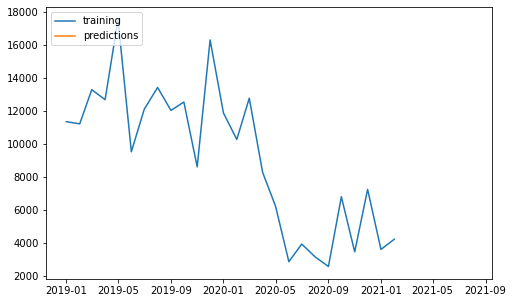

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=279.083, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=283.058, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=282.945, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=277.518, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=280.990, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=281.005, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=282.988, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=281.084, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=281.083, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.501 seconds


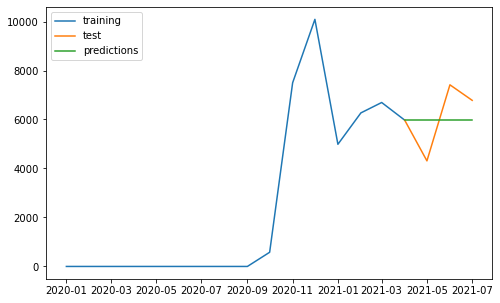

a
                 0
data              
2021-08-01  5975.0


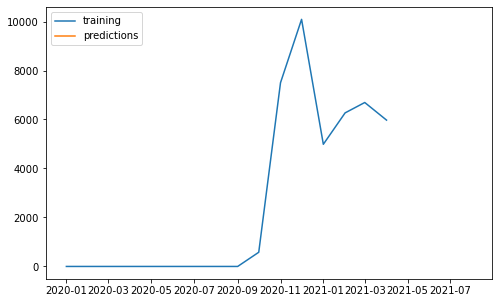

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=227.796, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=230.351, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=226.577, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=229.431, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=229.431, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=231.431, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=228.649, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=228.541, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.018 seconds


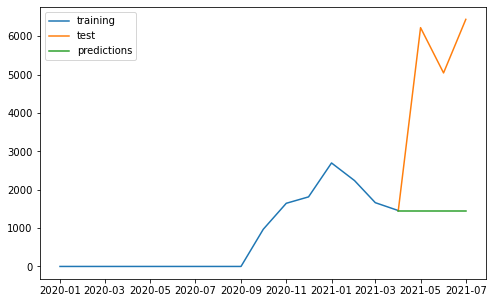

a
                 0
data              
2021-08-01  1457.0


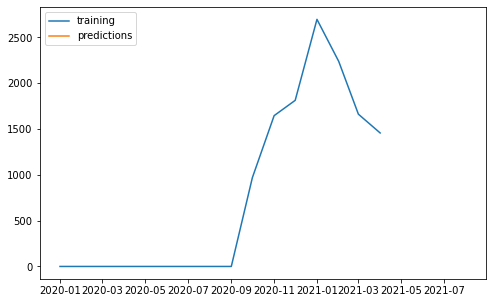

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-337.008, Time=0.03 sec
Total fit time: 0.031 seconds


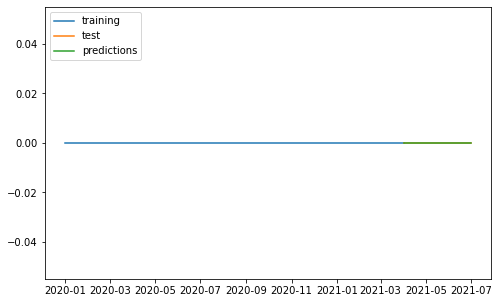

a
              0
data           
2021-08-01  0.0


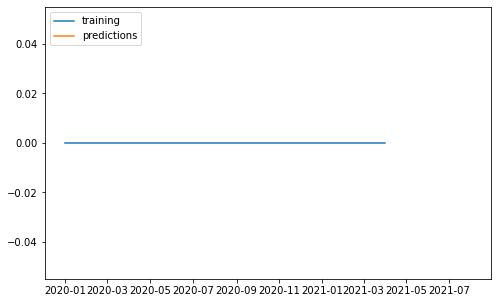

In [53]:
year = np.int64(date.today().year)
pred_list=pd.DataFrame()
pred_list["prefixo"]=[]
pred_list["gasto"]=[]
a=dataTotal[dataTotal["prefixo"].isin(cenop2["prefixo"])]    
list_dataTV=[]
for Cat in a["prefixo"].unique():
    list_dataTV.append(a[a.prefixo==Cat])

for Cat in range(len(list_dataTV)): 
    aux=list_dataTV[Cat]
    
    ##tratar outlier

    #max_threshold=aux['realizado'].quantile(0.95)
    #min_threshold=aux['realizado'].quantile(0.05)
    #media=aux.mean(axis=0 ,  skipna = True)
    #media[1]
    #for x in range(len(aux)):
    #    if (aux['realizado'].iloc[x]>max_threshold)|(aux['realizado'].iloc[x]<min_threshold):
    #        aux['realizado'].iloc[x]=media[1]



    
    

    train= aux[:(ma.floor(len(aux)*0.85))]
    test=aux[((ma.floor(len(aux)*0.85))-1):]




    arima_model = auto_arima(train["realizado"].dropna(),start_p=0,start_d=0,start_q=0,max_p=8,max_d=8,max_q=8,start_P=0,D=0,start_Q=0,max_P=8,max_D=8,max_Q=8,m=12, seasonal=True, error_action='warn' , trace = True , supress_warning=True ,stepwise = True, random_state=20,n_fits=50)


    

    predictions=pd.DataFrame(arima_model.predict(n_periods=len(test.index)),index=test.index)


    plt.figure(figsize=(8,5))
    plt.plot(train["realizado"], label="training")
    plt.plot(test["realizado"], label="test")
    plt.plot(predictions, label="predictions")
    plt.legend(loc="upper left")
    plt.show()


    from sklearn.metrics import r2_score
    train['predicted_sales']= predictions
    r2_score(predictions[0].dropna(),test['realizado'])
    
    
    aux2=aux.reset_index()
    aux2=aux2[-1:]
    month=pd.DatetimeIndex(aux2['data']).month
    year=pd.DatetimeIndex(aux2['data']).year
    next_month=month[0]+1
    next_year=year[0]
    if month==12:
        next_month=1
        next_year=year[0]+1
    newdatestr = (str(next_year) + str(next_month))
    newDate = pd.to_datetime(newdatestr, format="%Y%m")
    aaa=pd.DataFrame([{'data':newDate}])
    aaa.set_index("data", inplace=True)
    predictions=pd.DataFrame(arima_model.predict(n_periods=1),index=aaa.index)
    print("a")
    print(predictions)
    plt.figure(figsize=(8,5))
    plt.plot(train["realizado"], label="training")
    #plt.plot(test["realizado"], label="test")
    plt.plot(predictions, label="predictions")
    plt.legend(loc="upper left")
    plt.show()
    relVig=aux[np.int64(aux.index.year)==np.int64(year)]["realizado"].sum()
    pred_aux=pd.DataFrame([(int(aux["prefixo"].unique()[0]),int(predictions[0][0]),aux["orcado21"].sum(),relVig)] , columns=["prefixo","gasto","orcadoVigente","realizadoVigente"])
    
    pred_list=pred_list.append(pred_aux)
    

In [33]:
total_previsto=pred_list["gasto"].sum()

In [34]:
total_previsto

1478102.0

In [35]:
pred_list["percent"]=pred_list.gasto.apply(lambda x : (x/total_previsto))

In [36]:
pred_list["orcadoVigente"]=pred_list.orcadoVigente.apply(lambda x : (x*-1))

In [37]:
pred_list["desvio"]=0
for x in range(len(pred_list)):
        pred_list["desvio"].iloc[x]=pred_list["realizadoVigente"].iloc[x]-pred_list["orcadoVigente"].iloc[x]


In [38]:
pred_list

prefixo     gasto  orcadoVigente  realizadoVigente   percent   desvio
0    4811.0   35165.0       167460.0          149596.0  0.023791 -17864.0
0    8907.0    4255.0        37996.0           37708.0  0.002879   -288.0
0    8949.0  143786.0       813637.0          781556.0  0.097277 -32081.0
0    8889.0   16180.0       165393.0          144381.0  0.010946 -21012.0
0    8877.0    4970.0        34467.0           21392.0  0.003362 -13075.0
..      ...       ...            ...               ...       ...      ...
0    8370.0    6689.0        59065.0           48034.0  0.004525 -11031.0
0    8346.0    3966.0        25151.0           22798.0  0.002683  -2353.0
0    9024.0    5975.0        45581.0           42436.0  0.004042  -3145.0
0    9043.0    1457.0        25391.0           25762.0  0.000986    371.0
0    1909.0       0.0           -0.0               0.0  0.000000      0.0

[77 rows x 6 columns]

In [39]:
orc1909=1665739

orc_dist=int(0.9*orc1909)
orc_dist

1499165

In [40]:
total_prev=pred_list["gasto"].sum()-pred_list["desvio"].sum()

In [41]:
total_prev

2858954.0

In [42]:
pred_list["percent"]=0
for x in range(len(pred_list)):
        pred_list["percent"].iloc[x]=(pred_list["gasto"].iloc[x]-pred_list["desvio"].iloc[x])/total_prev

In [43]:
#pred_list["percent"]=pred_list.gasto.apply(lambda x : (x/total_previsto))

In [44]:
pred_list["gasto_ajustado"]=pred_list.percent.apply(lambda x : int(x*orc_dist))

In [45]:
pred_list

prefixo     gasto  orcadoVigente  realizadoVigente   percent   desvio  \
0    4811.0   35165.0       167460.0          149596.0  0.018548 -17864.0   
0    8907.0    4255.0        37996.0           37708.0  0.001589   -288.0   
0    8949.0  143786.0       813637.0          781556.0  0.061514 -32081.0   
0    8889.0   16180.0       165393.0          144381.0  0.013009 -21012.0   
0    8877.0    4970.0        34467.0           21392.0  0.006312 -13075.0   
..      ...       ...            ...               ...       ...      ...   
0    8370.0    6689.0        59065.0           48034.0  0.006198 -11031.0   
0    8346.0    3966.0        25151.0           22798.0  0.002210  -2353.0   
0    9024.0    5975.0        45581.0           42436.0  0.003190  -3145.0   
0    9043.0    1457.0        25391.0           25762.0  0.000380    371.0   
0    1909.0       0.0           -0.0               0.0  0.000000      0.0   

    gasto_ajustado  
0            27807  
0             2382  
0            92220  
0            19502  
0             9462  
..             ...  
0             9291  
0             3313  
0             4782  
0              569  
0                0  

[77 rows x 7 columns]

In [46]:
pred_list.to_excel("output.xlsx")

In [47]:
#### tratar valor dristribuido como negativo